In [1]:
import numpy as np
import sympy as sp
#from mayavi import mlab
import matplotlib.pyplot as plt 
import os.path
import matplotlib as mpl
import h5py
import time
mpl.style.use('classic')
%matplotlib ipympl

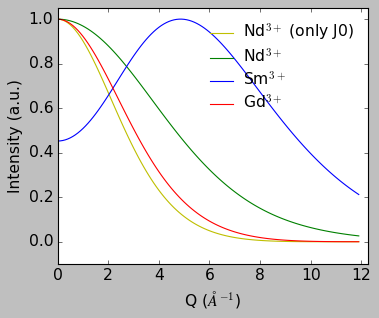

In [2]:
######## Formfactor of Nd3+ ##########
## Q is in \AA^{-1}
x = sp.symbols('x')
def ndformfact(x):
    s,j,l,ss = x/(4*sp.pi), 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    fm = (0.054*sp.exp(-25.0293*s**2)+0.3101*sp.exp(-12.102*s**2)+
    0.6575*sp.exp(-4.7223*s**2)-0.0216+s**2*(0.6751*sp.exp(-18.3421*s**2)+
    1.6272*sp.exp(-7.26*s**2)+0.9644*sp.exp(-2.6016*s**2)+0.015)*fc)
    return fm**2

def ndformfact0(q):# use numpy not sp (only J0)
    s,j,l,ss = q/(4*np.pi), 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
    j0 = [0.0540,25.0293,0.3101,12.1020,0.6575,4.7223,-0.0216]
    fm = j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
    return fm**2

def ndformfact1(q):# use numpy not sp
    s,j,l,ss = q/(4*np.pi), 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0540,25.0293,0.3101,12.1020,0.6575,4.7223,-0.0216]
    j2 = [0.6751,18.3421,1.6272,7.2600,0.9644,2.6016,0.0150]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def smformfact(q):# use numpy not sp
    s,j,l,ss = q/(4*np.pi), 5/2., 10./2, 5/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0288,25.2068,0.2973,11.8311,0.6954,4.2117,-0.0213]
    j2 = [0.4707,18.4301,1.4261,7.0336,0.9574,2.4387,0.0182]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def gdformfactSP(q):# Gd3+ form factor
    s,j,l,ss = q/(4*sp.pi), 7/2., 0, 7/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0186,25.3867,0.2895,11.1421,0.7135,3.7520,-0.0217]
    j2 = [0.3347,18.4758,1.2465,6.8767,0.9537,2.3184,0.0217]
    
    fm = (j0[0]*sp.exp(-j0[1]*s**2) + j0[2]*sp.exp(-j0[3]*s**2)+j0[4]*sp.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*sp.exp(-j2[1]*s**2)+j2[2]*sp.exp(-j2[3]*s**2)+j2[4]*sp.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def gdformfact(q):# Gd3+ form factor
    s,j,l,ss = q/(4*np.pi), 7/2., 0, 7/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0186,25.3867,0.2895,11.1421,0.7135,3.7520,-0.0217]
    j2 = [0.3347,18.4758,1.2465,6.8767,0.9537,2.3184,0.0217]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def tbformfact(x):
    s,j,l,ss = x/(4*sp.pi), 6., 3., 3. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0177,25.5095,0.2921,10.5769,0.7133,3.5122,-0.0231]
    j2 = [0.2892,18.4973,1.1678,6.7972,0.9437,2.2573,0.0232]
    
    fm = (j0[0]*sp.exp(-j0[1]*s**2) + j0[2]*sp.exp(-j0[3]*s**2)+j0[4]*sp.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*sp.exp(-j2[1]*s**2)+j2[2]*sp.exp(-j2[3]*s**2)+j2[4]*sp.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def tbformfactNP(q):# Tb3+ form factor
    s,j,l,ss = q/(4*np.pi), 6., 3., 3. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0177,25.5095,0.2921,10.5769,0.7133,3.5122,-0.0231]
    j2 = [0.2892,18.4973,1.1678,6.7972,0.9437,2.2573,0.0232]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

#ndformfact(1).doit()

# vetorize the function
ndff = sp.lambdify(x, ndformfact(x), modules=['numpy', 'sympy'])
tbff = sp.lambdify(x, tbformfact(x), modules=['numpy', 'sympy'])
#Plot
qdata = np.arange(0.0,12.,0.1)

ndform = ndff(qdata)# use sp
ndform0 = ndformfact0(qdata) # use np only J0
ndform1 = ndformfact1(qdata) # use np
smform = smformfact(qdata)
gdform = gdformfact(qdata)

tbform = tbff(qdata) # use sp
%matplotlib inline
fig = plt.figure(figsize=(5,4))
plt.plot(qdata,ndform0,label=r'Nd$^{3+}$ (only J0)',c='y')#qdata,ndform, 
plt.plot(qdata,ndform1,label=r'Nd$^{3+}$',c='g')#qdata,ndform, 
plt.plot(qdata,smform/np.max(smform),label=r'Sm$^{3+}$',c='b')
plt.plot(qdata,gdform,label=r'Gd$^{3+}$',c='r')
#plt.plot(qdata,tbform,label='Tb3+')

ax = plt.gca()
ax.set_xlim(0, 12.25)
ax.set_ylim(-0.1, 1.05)
ax.set_xlabel('Q ($\AA^{-1}$)',fontsize=14)
ax.set_ylabel('Intensity (a.u.)',fontsize=14)

plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

ax.legend(fontsize=14,loc='best', handletextpad=0.6, labelspacing=0.3,handlelength=1.5, scatterpoints=1, numpoints=1,ncol=1,frameon=False)#,title='Q ranges')
#fig.savefig(r'D:\7_Writing\0_my_phd_thesis\Figures\technique\ndsmgd_formfact.pdf', bbox_inches='tight',verbose=True)  
plt.show()

In [43]:
j,l,ss = 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
print(fc)

1.75


# Define hkl, strfact(allpos,spins) Sympy fun

In [3]:
"""
Define strfct(allpos,spins), 
later use
magstrf= sp.lambdify((h,k,l), strfct(allpos,spins), modules=['numpy', 'sympy'])
vectorize the function for (hkl)
"""

h, k, l= sp.symbols('h k l',real=True)
q = sp.Matrix([h,k,l])
qnormed = q/q.norm()

def strfct(allpos,spins):
    # Structure factor
    Sx, Sy, Sz = 0.,0.,0.
    for i in np.arange(len(allpos)):
        Sx = Sx + spins[i,0]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
        Sy = Sy + spins[i,1]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
        Sz = Sz + spins[i,2]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))

    Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.
    Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed # neutron scattering
    ss = (Sperp.T*Sperp.conjugate())[0,0]
    return ss

def pschhl(allpos,spins):#polarized neutron scattering for hhl plane
    pl = sp.Matrix([1,-1,0])
    Sx, Sy, Sz = 0.,0.,0.
    for i in np.arange(len(allpos)):
        Sx = Sx + spins[i,0]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
        Sy = Sy + spins[i,1]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
        Sz = Sz + spins[i,2]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    
    Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.
    Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed # neutron scattering
    Sp= Sperp - (Sperp.T*pl)[0,0]*pl/2. # '2' for normlization of pl
    #Sp= (Sperp.T*pl)[0,0]*pl/2. # spin non filp channel
    ss = (Sp.T*Sp.conjugate())[0,0]
    return ss


In [4]:
def pltmap(x,y,intensity,ki,smooth,vmin,vmax):# x,y,intensity is 2D
    # Smooth the pattern by Apply gaussian filter
    import scipy as sp
    import scipy.ndimage 
    sigma_y = smooth[0]
    sigma_x = smooth[1]
    sigma = [sigma_y, sigma_x]
    Z = sp.ndimage.filters.gaussian_filter(intensity, sigma, mode='constant')
    
    # only plot Instrument largest Q range
    if ki!=None:
        Qmod = np.sqrt(2*x**2+y**2)
        Z = np.ma.masked_where(Qmod > ki, Z)

    fig = plt.figure(figsize=(5,4))
    pcol = plt.pcolormesh(x, y, Z, cmap='jet',vmin=vmin,vmax=vmax,linewidth=0,rasterized=True)# '_r' is reversed colormap
    #pcol = plt.pcolormesh(x, y, Zm, cmap='RdBu_r',linewidth=0,rasterized=True)# '_r' is reversed colormap
    
    pcol.set_edgecolor('face') # remove the white lines in the plot
    #plt.title(fname)
    if ki!=None:
        plt.axis([ -ki/1.414, ki/1.414,-ki, ki])
    plt.xlabel('(HH0)',size=14)
    plt.ylabel('(00L)',size=14)
    plt.minorticks_on()
    plt.xticks(color='k', size=14)
    plt.yticks(color='k', size=14)
    
    # set colorbar and its properties
    cb = plt.colorbar() # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
    cb.ax.tick_params(labelsize=12)
    return fig, plt.gca(), cb


# Calcualte the structure factor of FM or AFM chains

In [ ]:
a=9*21.95+15.49+58.99
a*7.8
850+480+68+900

In [5]:
# Ｓｅｔ　ｕｐ　ｔｈｅ　ｌａｔｔｉｃｅ　ａｎｄ　ｃａｌｃｕａｌｔｅ　ｔｈｅ　ｎｕｔｒｏｎｓ　ｓｃａｔｔｅｒｉｎｇ
# Method 1: limited nb of atoms in the chain

# lattice and spin order
nAtom = 2
allpos = np.array([[0,0,0],[0.25,0.25,0]]) # spin positions
spins = np.array([[1,1,1],[1,1,-1]])# FM order
#spins = np.array([[1,1,1],[-1,-1,1]])# AFM order

#spins = np.array([[0,0,1],[0,0,1]])# colinear FM order
#spins = np.array([[0,0,1],[0,0,-1]])# colinear AFM order
#spins = np.array([[1,1,0],[1,1,0]])# colinear AFM order

nAtom = 6
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.5,0.5,0],[0.75,0.75,0],[1,1,0],[1.25,1.25,0]]) # spin positions
spins = np.array([[1,1,1],[1,1,-1],[1,1,1],[1,1,-1],[1,1,1],[1,1,-1]])# FM order
spins = np.array([[1,1,1],[-1,-1,1],[1,1,1],[-1,-1,1],[1,1,1],[-1,-1,1]])# AFM order

# Structure factor
h, k, l, m, n = sp.symbols('h k l m n',real=True)
q = sp.Matrix([h,k,l])
qnormed = q/q.norm()

Sx, Sy, Sz = 0.,0.,0.
for i in np.arange(nAtom):
    Sx = Sx + spins[i,0]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sy = Sy + spins[i,1]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sz = Sz + spins[i,2]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))

Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.
Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed # neutron scattering

# Clc the 2theta, q in A^-1, and lorizain factor
const = 0.07265 #*2**2*7/2.*9/2. # in barn per 7 muB
wavel = 2.38 # wavelength of E2 experiment
latt = 10.65 # lattice parameter
theta = sp.asin(wavel/(2*latt/q.norm())) # theta in rad
qabs = 2*sp.pi*q.norm()/10.67 # Q in absolute unit A^-1
lorf = 2*(sp.sin(theta))**2*sp.cos(theta) # Lorizain factor

#ss = (const*ndformfact(qabs)*Sperp.T*Sperp.conjugate())[0,0] # this one works well
ss = (Sperp.T*Sperp.conjugate())[0,0] # this one works well

sp.init_printing()
#sp.simplify(ss)

magstrf= sp.lambdify((h,k,l), ss, modules=['numpy', 'sympy']) # vectorize the function

# qs = np.array([[0,0,0],[1,1,0],[2,2,0],[3,3,0],[4,4,0],[5,5,0],
#               [0,0,1],[0,0,2],[0,0,3],[1,1,1],[1,1,2],[1,1,3]])
# np.set_printoptions(suppress=True)
# print magstrf(qs[:,0],qs[:,1],qs[:,2]).real

In [6]:
# Method 2: unlimited nb of atoms in the chain
# lattice and spin order
nAtom = 100 # set how many spin wanted: the more the sharper

lattice = np.array([0.25,0.25,0])
spins = np.array([[1,1,1],[1,1,-1]])# FM order
#spins = np.array([[1,1,1],[-1,-1,1]])# AFM order

# Structure factor
h, k, l = sp.symbols('h k l',real=True)
q = sp.Matrix([h,k,l])
qnormed = q/q.norm()

Sx, Sy, Sz = 0.,0.,0.
for i in np.arange(nAtom):
    idx = np.remainder(i,2)
    pos = i*lattice
    Sx = Sx + spins[idx,0]*sp.exp(2 * sp.pi * sp.I * q.dot(pos))#*sp.exp(-i*0.25*1.414/5.) # decay with correlation length 5
    Sy = Sy + spins[idx,1]*sp.exp(2 * sp.pi * sp.I * q.dot(pos))#*sp.exp(-i*0.25*1.414/5.)
    Sz = Sz + spins[idx,2]*sp.exp(2 * sp.pi * sp.I * q.dot(pos))#*sp.exp(-i*0.25*1.414/5.)

Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.
Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed # neutron scattering

# Clc the 2theta, q in A^-1, and lorizain factor
const = 0.07265 #*2**2*7/2.*9/2. # in barn per 7 muB
wavel = 2.38 # wavelength of E2 experiment
latt = 10.65 # lattice parameter
theta = sp.asin(wavel/(2*latt/q.norm())) # theta in rad
qabs = 2*sp.pi*q.norm()/10.67 # Q in absolute unit A^-1
lorf = 2*(sp.sin(theta))**2*sp.cos(theta) # Lorizain factor

ss = (const*ndformfact(qabs)*Sperp.T*Sperp.conjugate())[0,0] # this one works well
#ss = (Sperp.T*Sperp.conjugate())[0,0] # this one works well

sp.init_printing()
#sp.simplify(ss)

magstrf= sp.lambdify((h,k,l), ss, modules=['numpy', 'sympy']) # vectorize the function

In [7]:
# ３Ｄ　ｃａｌｃｕｌａｔｅ　ａｎｄ　ｐｌｏｔ
# not suitable for because it is just two spins included
nQx, nQy, nQz = 11,501,11 # x along (ool), y along (hh0)
x = np.linspace(-6,6,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
z = np.linspace(0,1,nQz,endpoint=True)

X,Y,Z= np.meshgrid(x,y,z, indexing='ij')# why we need indexing?

axes = np.array([[0,0,1],[1,1,0],[1,-1,0]])
hkl = np.squeeze(X.ravel()[:,None,None]*axes[0,:] + Y.ravel()[:,None,None]*axes[1,:] + Z.ravel()[:,None,None]*axes[2,:])

# other way to generate 3D hkl
#hkl1 = np.vstack((Y.ravel()+Z.ravel(), Y.ravel()-Z.ravel(), X.ravel()))
#print hkl==hkl1.T,'\n',hkl, '\n', hkl1
#fpath=r'D:/5_Neutron Scattering/3_D20_ILL_Dec2014/hkls.txt'
#np.savetxt(fpath,X.ravel(), fmt='%f')

intensity = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy,nQz))
intensity = intensity/np.nanmax(intensity)
intensity[np.isnan(intensity)]=0

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in true_divide
  return (0.222490625*((0.00219589297744642*h**2 + 0.00219589297744642*k**2 + 0.00219589297744642*l**2)*(0.6751*exp(-0.04027728858162*h**2 - 0.04027728858162*k**2 - 0.04027728858162*l**2) + 1.6272*exp(-0.015942183016261*h**2 - 0.015942183016261*k**2 - 0.015942183016261*l**2) + 0.9644*exp(-0.00571283517012461*h**2 - 0.00571283517012461*k**2 - 0.00571283517012461*l**2) + 0.015) + 0.0308571428571429*exp(-0.0549616641003997*h**2 - 0.0549616641003997*k**2 - 0.0549616641003997*l**2) + 0.1772*exp(-0.0265746968130566*h**2 - 0.0265746968130566*k**2 - 0.0265746968130566*l**2) + 0.375714285714286*exp(-0.0103696654073952*h**2 - 0.0103696654073952*k**2 - 0.0103696654073952*l**2) - 0.0123428571428571)**2*(-h*(h*(exp(2*1j*pi*(0.25*h + 0.25*k)) + exp(2*1j*pi*(0.5*h + 0.5*k)) + exp(2*1j*pi*(0.75*h + 0.75*k)) + exp(2*1j*pi*(1.0*h + 1.0*k)) + exp(2*1j*pi*(1.25*h + 1.25*k)) + exp(2*1j*pi*(1.5*h + 1.5*k)) + exp(2*1j*pi*(1.75*

In [9]:
# 3D plot with Mayavi
%gui qt
mfig = mlab.figure(bgcolor=(1,1,1), fgcolor=(0.,0.,0.))

from smoothn import smoothn
smooth = 2
intensity1, s, exitflag, Wtot = smoothn(intensity*0.8,s=smooth) 

grid=mlab.pipeline.scalar_field(X,Y,Z,intensity1)
vmin, vmax = 0,0.18
#extend: shape of the volume but the axis lable changes also. Axes range could change the lable back.
isos = mlab.pipeline.iso_surface(grid,opacity=0.5,transparent=True,vmin=vmin,vmax=vmax,extent=[-4,4,-4,4,0,2],
                                contours=50)
#mlab.pipeline.volume(grid,vmin=vmin,vmax=vmax)

mlab.outline()
ax = mlab.axes(xlabel=r'(00L)',ylabel='(HH0)',zlabel="(K-K0)",nb_labels=5,
              ranges=[-6,6,-5,5,0,1])#,y_axis_visibility = False)
ax.axes.font_factor = 2
ax.axes.label_format = '%1.1f'
ax.label_text_property.bold = False
ax.label_text_property.italic = False
ax.label_text_property.color = (.0, .0, .0)
ax.property.color = (1.0, 1.0, 1.0) 
ax.title_text_property.bold = False
ax.title_text_property.italic = False

cb = mlab.colorbar(title='Intensity (a.u.)', orientation='horizontal', nb_labels=5, label_fmt='%.4f')
cb.scalar_bar_representation.position = [0.1, 0.85] # colorbar x0 and y0 
cb.scalar_bar_representation.position2 = [0.6, 0.13] # colorbar width and hight
cb.title_text_property.bold = False
cb.title_text_property.italic = False
cb.label_text_property.font_family = 'arial'

cb.label_text_property.color = (0.,0.,0.)
cb.label_text_property.bold = False
cb.label_text_property.italic = False
cb.label_text_property.font_size = 100

NameError: name 'mlab' is not defined

In [ ]:
# 2D plot with Matplotlib 

# Integrated along [1-10] of 3D data
X1,Y1= np.meshgrid(x,y, indexing='ij')
intensity2D = intensity.sum(axis=2)

# Or we can generate new data at 0[1-10] plane
# nQx, nQy= 101,101
# x = np.linspace(-6,6,nQx,endpoint=True)
# y = np.linspace(-6,6,nQy,endpoint=True)
# X, Y = np.meshgrid(x, y)
# hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T
# intensity2D = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T


In [ ]:
# Plot
fig, ax, cb = pltmap0(Y1,X1,intensity2D/intensity2D.max()*10,ki=None,smooth=[0.,2],vmin=0,vmax=0.25*10,fs=20)
ax.set_xlim([-3.5,3.5])
ax.set_ylim([-6,6])
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
#fig.savefig(os.path.join(fpath,'afm_chain_strFct_2D_1.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

In [44]:
print(x.shape, y.shape, intensity2D.shape)

((11L,), (501L,), (11L, 501L))


<IPython.core.display.Javascript object>


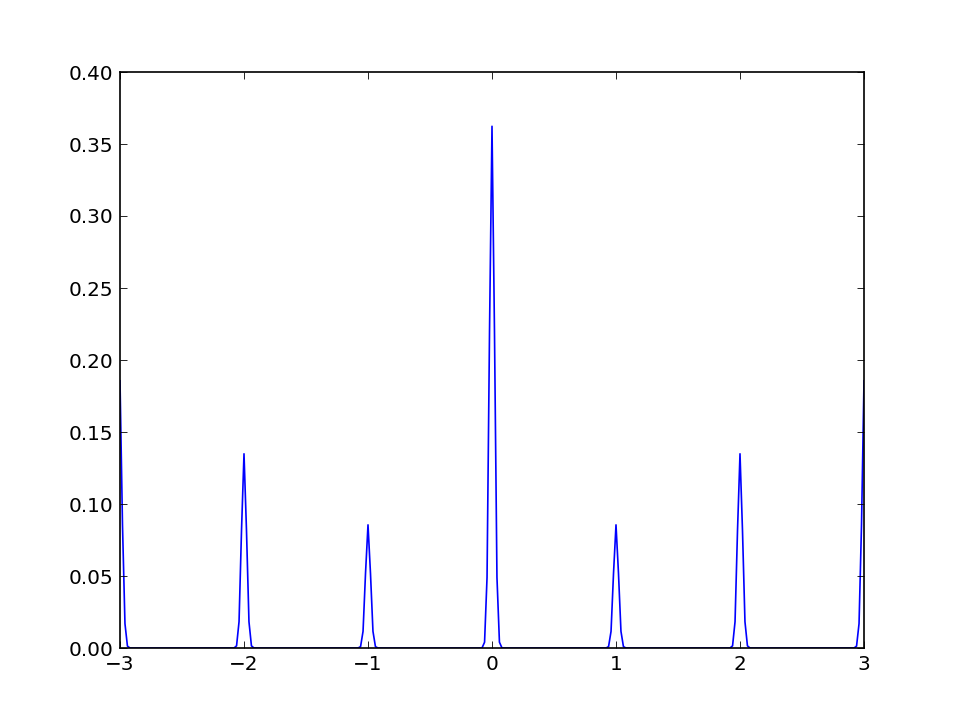

In [51]:
def cut2d(x,y,mat, ool, hho, intax):# ool is row (x, ax=0), hho is col(y, ax=1)
    mask0 = (y>=hho[0])&(y<=hho[1])
    mask1 = (x>=ool[0])&(x<=ool[1])

    cut = np.ix_(mask1, mask0)# ool is row, hho is col
    I2d = np.mean(mat[cut],axis=intax)
    if intax==1: # integrate the (hho) axis
        ax = x[(x>=ool[0])&(x<=ool[1])]
    elif intax==0: # integrate the (ool) axis
        ax = y[(y>=hho[0])&(y<=hho[1])]
    return ax, I2d
from scipy.ndimage import gaussian_filter1d

ax1, cut = cut2d(x,y,intensity2D/intensity2D.max(),[0,5],[-3,3],0)

plt.figure()
plt.plot(ax1,gaussian_filter1d(cut,sigma=1))
np.savetxt(r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110\FM_chain.txt',np.vstack([ax1,cut]).T,
           fmt='%.3e')

In [11]:
def pltmap0(x,y,intensity,ki,smooth,vmin,vmax,fs):# x,y,intensity are 2D
    # Smooth the pattern by Apply gaussian fil
    import scipy as sp
    import scipy.ndimage 
    sigma_y = smooth[0]
    sigma_x = smooth[1]
    sigma = [sigma_y, sigma_x]
    Z = sp.ndimage.filters.gaussian_filter(intensity, sigma, mode='constant')
    
    # only plot Instrument largest Q range
    if ki!=None:
        Qmod = np.sqrt(2*x**2+y**2)
        Z = np.ma.masked_where(Qmod > ki, Z)

    fig = plt.figure(figsize=(5,4))
    pcol = plt.pcolormesh(x, y, Z, cmap='jet',vmin=vmin,vmax=vmax,linewidth=0,rasterized=True)# '_r' is reversed colormap
    #pcol = plt.pcolormesh(x, y, Zm, cmap='RdBu_r',linewidth=0,rasterized=True)# '_r' is reversed colormap
    
    pcol.set_edgecolor('face') # remove the white lines in the plot
    #plt.title(fname)
    if ki!=None:
        plt.axis([ -ki/1.414, ki/1.414,-ki, ki])
    plt.xlabel('(H -H 0)',size=24)
    plt.ylabel('(0 0 L)',size=24)
    plt.minorticks_on()
    plt.xticks(color='k', size=fs)
    plt.yticks(color='k', size=fs)
    
    # set colorbar and its properties
    #cb = plt.colorbar() # label='Intensity', ticks=range(0,100)
    #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
    #cb.ax.tick_params(labelsize=15)
    cb = plt.colorbar(ticks=np.linspace(0,vmax,6),pad=0.02)
    cb.ax.tick_params(labelsize=fs)
    cb.ax.set_ylabel('Intensity (a.u.)',fontsize=25)
    #cb.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
    return fig, plt.gca(), cb

<IPython.core.display.Javascript object>


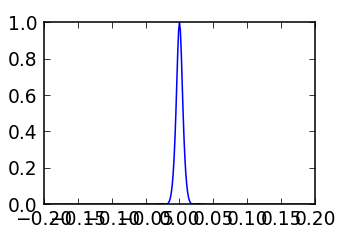

In [10]:
# Plot 1D scattering at zero along (110)
# Fit to see the finite size and correlatin decay effects on the peak width
nQx = 301
x = np.linspace(-0.2,0.2,nQx,endpoint=True)
y = np.zeros(nQx)
y = np.ones(nQx)
y = np.full([1,nQx],0.01)

hkl = np.vstack([x,x,y]).T

intensity = magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real
intensity = intensity/np.nanmax(intensity)
intensity[np.isnan(intensity)]=0

plt.figure(figsize=(5,4))
plt.plot(x,intensity)
plt.show()

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 44
    # data points      = 301
    # variables        = 3
    chi-square         = 0.114
    reduced chi-square = 0.000
    Akaike info crit   = -2364.244
    Bayesian info crit = -2353.122
[[Variables]]
    sigma:       0.00440756 +/- 7.10e-05 (1.61%) (init= 0.01)
    center:     -4.2597e-08 +/- 5.02e-05 (117753.35%) (init= 0)
    amplitude:   0.01478785 +/- 0.000168 (1.14%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, amplitude)          =  0.707 



<IPython.core.display.Javascript object>


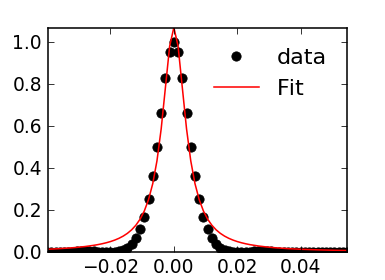

Correlation Length is 51.06659 in unit of a
Length of the spin chian 35.35534 in unit of a


In [11]:
# Fit the peak to get the correlation length
from lmfit import Model
from lmfit.lineshapes import lorentzian

mod  = Model(lorentzian)
pars = mod.make_params(amplitude=1, center=0, sigma=0.01)
#pars['sigma'].vary = False

y = intensity
result =  mod.fit(y, params=pars, x=x)
print(result.fit_report())

# plot results
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
axs.plot(x, y, 'ko',label='data')
axs.plot(x, result.best_fit, 'r-',label='Fit')
axs.legend(loc='best',numpoints=1,frameon=False).draggable()
plt.show()

sigma = result.best_values['sigma']
unit110 = 2*np.pi/np.sqrt(2.)

print('Correlation Length is {:1.5f} in unit of a'.format(1/(unit110*sigma)))
print('Length of the spin chian {:1.5f} in unit of a'.format(nAtom/4.*np.sqrt(2.)))

In [80]:
print('Correlation Length is {:1.5f} in unit of a'.format(1/(2*sigma*4)))

Correlation Length is 17.84424 in unit of a


# Single tetrahedron

## Spin ice: single tedrahedra

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in divide
  return h**2*(k*(exp(2*1j*pi*(0.25*h + 0.25*k)) - exp(2*1j*pi*(0.25*h + 0.25*l)) - exp(2*1j*pi*(0.25*k + 0.25*l)) + 1.0)/sqrt(h**2 + k**2 + l**2) + l*(exp(2*1j*pi*(0.25*h + 0.25*k)) - exp(2*1j*pi*(0.25*h + 0.25*l)) + exp(2*1j*pi*(0.25*k + 0.25*l)) - 1.0)/sqrt(h**2 + k**2 + l**2))*(k*(1.0 - exp(-2*1j*pi*(0.25*k + 0.25*l)) - exp(-2*1j*pi*(0.25*h + 0.25*l)) + exp(-2*1j*pi*(0.25*h + 0.25*k)))*conjugate(1/sqrt(h**2 + k**2 + l**2)) + l*(-1.0 + exp(-2*1j*pi*(0.25*k + 0.25*l)) - exp(-2*1j*pi*(0.25*h + 0.25*l)) + exp(-2*1j*pi*(0.25*h + 0.25*k)))*conjugate(1/sqrt(h**2 + k**2 + l**2)))*conjugate(1/sqrt(h**2 + k**2 + l**2))/sqrt(h**2 + k**2 + l**2) + (-k*(k*(exp(2*1j*pi*(0.25*h + 0.25*k)) - exp(2*1j*pi*(0.25*h + 0.25*l)) - exp(2*1j*pi*(0.25*k + 0.25*l)) + 1.0)/sqrt(h**2 + k**2 + l**2) + l*(exp(2*1j*pi*(0.25*h + 0.25*k)) - exp(2*1j*pi*(0.25*h + 0.25*l)) + exp(2*1j*pi*(0.25*k + 0.25*l)) - 1.0)/sqrt(h**2 + k**2 + l**2))/sqr

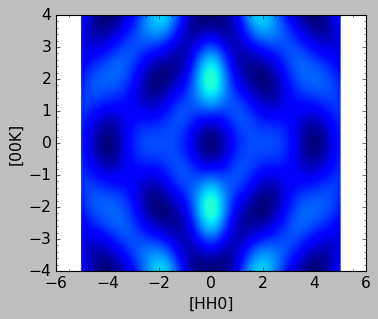

In [7]:
# Ｓｐｉｎ　ｉｃｅ：　ｓｕｍ　ｏｖｅｒ　ｄｉｆｆｅｒｅｎｔ　ｈｈｌ　ｐｌａｎｅ　ｏｎ　ｏｎｅ　ｄｏｍａｉｎ
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions

spins = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])# AIAO order
spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])# TITO order: in, in, out, out

# three PC domains produces the same pattern
#spins = np.array([[1,-1,0],[-1,1,0],[1,1,0],[-1,-1,0]])# PC order: spins in XY plane 1//2 3//4
#spins = np.array([[1,0,-1],[1,0,1],[-1,0,1],[-1,0,-1]])# PC order: spins in XZ plane 2//4, 1//3
spins = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])# PC order: spins in YZ plane 2//3, 1//4

magstrf= sp.lambdify((h,k,l), strfct(allpos,spins), modules=['numpy', 'sympy']) # vectorize the function

nQx, nQy, nQz = 101,101,101
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T
intensity0 = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T

hkl = np.vstack((Y.ravel(), X.ravel(), Y.ravel())).T
intensity1 = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T

hkl = np.vstack((X.ravel(), Y.ravel(), Y.ravel())).T
intensity2 = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T

intensity2D = intensity0#+intensity1+intensity2
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D,vmax = 40,
                      cmap=plt.cm.jet,linewidth=0,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

## Powder averange of single tetrahedron (3 methods)

c:\Users\jhxup\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


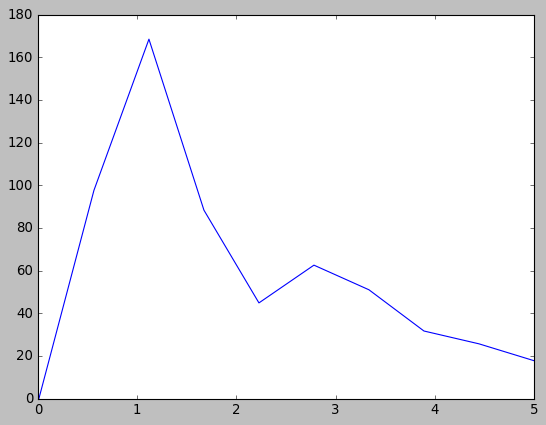

[[0.98046121 2.30015902 3.25012901]
 [3.50913012 2.72207095 2.52296686]
 [3.58856962 0.39929744 1.54972212]
 ...
 [0.57267691 2.27710231 1.29564538]
 [0.94448929 2.82938266 1.23485295]
 [0.34704176 2.43497722 0.97849665]]


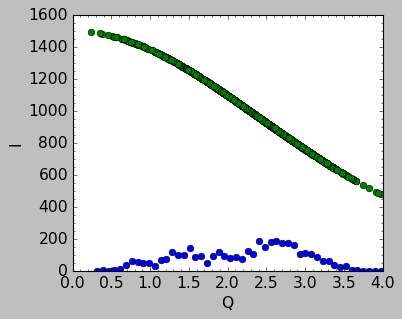

In [8]:
# Method 1: use integration with Sympy funcion defined above
from scipy import integrate
def pow_sf(sf, a, q): # questions: *sin(th), /4pi？
    def strff(th,phi):
        [h,k,l] = np.array([q*np.sin(th)*np.cos(phi), q*np.sin(th)*np.sin(phi), q*np.cos(th)])/(2*np.pi/a) 
        return sf(h,k,l)# *npsin(th)?
    return integrate.nquad(strff, [[0, np.pi],[0, 2*np.pi]])[0] #/ 4*np.pi?
vfunc = np.vectorize(pow_sf, excluded=['sf','a'])
qs = np.linspace(0.01,5.0,10)
sfs = gdformfact(qs) * vfunc(magstrf,10.4,qs)
plt.figure()
plt.plot(qs,sfs)
plt.show()

# Method 2: use random q points (wrong results)
# try: https://stackoverflow.com/questions/14071704/integrating-a-multidimensional-integral-in-scipy
hkls = np.random.random([1000,3])*4
print(hkls)
qs = 2*np.pi*np.sum(hkls**2,axis=1)**0.5/10.44
#qs = np.sum(hkls**2,axis=1)**0.5

intensity = gdformfact(qs)*magstrf(hkls[:,0],hkls[:,1],hkls[:,2]).real

hist, bin_edges = np.histogram(qs, bins=50, range=(qs.min(),qs.max()),weights=intensity)

fig = plt.figure(figsize=(5,4))
plt.plot(bin_edges[1:],hist,'o')
plt.plot(qs,gdformfact(qs)*1500,'o')
plt.xlabel('Q',size=14)
plt.ylabel('I',size=14)
plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

In [29]:
# Method 3: use numpy and integration
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
spins = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])# AIAO order
#spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])# TITO order: in, in, out, out
spins = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])# PC order: spins in YZ plane 2//3, 1//4
#spins = np.array([[0,-1,1],[0,1,1],[0,-1,-1],[0,1,-1]])# gamma 5: spins in YZ plane 2//3, 1//4
#spins = np.array([[1,-1,0],[-1,1,0],[-1,-1,0],[1,1,0]])# gamma 5: spins in XY plane 1//2 3//4

def strfct_np(q, rs, spins):# q and rs in relative unit (lat_const=1)
    # Structure factor
    qnormed = q/np.sum(q**2)**0.5
    phases = np.exp(2 * np.pi * 1.j * q@rs.T)# one row
    Sqvec = phases@spins

    Sperp = Sqvec-(Sqvec@qnormed.T)*qnormed # neutron scattering
    ss = Sperp@np.conj(Sperp.T)
    return ss

sf_func = lambda q: strfct_np(q, allpos, spins)# new fun only taking in q

from scipy import integrate
def pow_sf(sf_func, a, q): 
    def sf_polar(th,phi):
        q_vec = np.array([q*np.sin(th)*np.cos(phi), q*np.sin(th)*np.sin(phi), q*np.cos(th)])/(2*np.pi/a) 
        return sf_func(q_vec)*np.sin(th)
    return integrate.nquad(sf_polar, [[0, np.pi],[0, 2*np.pi]],opts={'epsrel':0.01})[0] / (4*np.pi) # How about the Loritz factor?

vfunc = np.vectorize(pow_sf, excluded=['sf_func','a'])

qs = np.linspace(0.01,5.0,20) # q in absolute unit

import time
t = time.time()
sfs4 = gdformfact(qs) * vfunc(sf_func,10.4,qs)
elapsed = time.time() - t
print(elapsed)

plt.figure()
plt.plot(qs,sfs4/4/2*(7*8)*0.07265,label=r'without $/q^2$')# convert to abs unit /N_ions /mu^2 * S(S+1) * 0.07265
plt.xlabel('$Q(\AA^-1)$')
plt.ylabel('$I(barn)$')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


13.855242490768433


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Powder average of single tetra (single func)

In [10]:
def powder(a, rs, spins, qs):
    def strfct_np(q, rs, spins):
        # Structure factor
        # q and rs in relative unit (lat_const=1)
        qnormed = q/np.sum(q**2)**0.5
        phases = np.exp(2 * np.pi * 1.j * q@rs.T)# one row
        Sqvec = phases@spins

        Sperp = Sqvec-(Sqvec@qnormed.T)*qnormed # neutron scattering
        ss = Sperp@np.conj(Sperp.T)
        return ss

    def sf_func(q):# new fun only taking in q
        return strfct_np(q, rs, spins)
    
    from scipy import integrate
    def pow_sf(a, q): 
        
        def sf_polar(th,phi):
            q_vec = np.array([q*np.sin(th)*np.cos(phi), q*np.sin(th)*np.sin(phi), q*np.cos(th)])/(2*np.pi/a) 
            return sf_func(q_vec)*np.sin(th)# sin(th) for integration average
        
        return integrate.nquad(sf_polar, [[0, np.pi], [0, 2*np.pi]], opts={'epsrel':0.001})[0] / (4*np.pi) # How about the Loritz factor?
    
    vfunc = np.vectorize(pow_sf, excluded=['a'])
    
    return vfunc(a,qs)/rs.shape[0]# nornalized to per sqrt3**2 moment**2

def strfct_np(q, rs, spins):
    # Structure factor for single crystal
    # q and rs in relative unit (lat_const=1)
    '''
    q: nq by 3
    rs: nr by 3
    spins: nr by 3
    '''
    qnormed = q / (np.sum(q**2,axis=1).reshape(-1,1))**0.5
    phases = np.exp(2 * np.pi * 1.j * q@rs.T)# one row
    Sqvec = phases@spins

    Sperp = Sqvec- np.sum(Sqvec*qnormed,axis=1).reshape(-1,1)*qnormed # neutron scattering
    ss = np.sum(Sperp*np.conj(Sperp),axis=1)
    return ss
    
def pow_spinvert(a, rs, spins, qs):
    pass    

C:\Users\jxu\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


KeyboardInterrupt: 

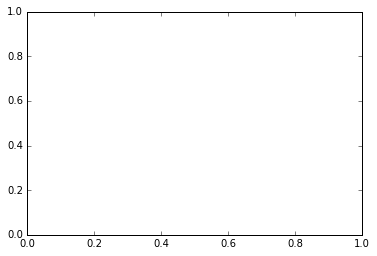

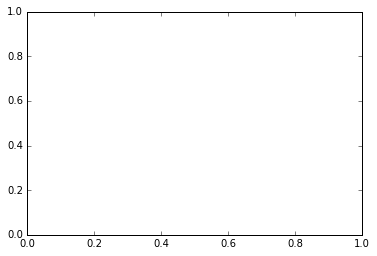

In [11]:
# all strucutres
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions

spins0 = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3.)# AIAO order
spins1 = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])/np.sqrt(3.)# TITO order: in, in, out, out
spins2 = np.array([[0,-1,1],[0,1,1],[0,-1,-1],[0,1,-1]])/np.sqrt(2.)# gamma 5: spins in YZ plane 2//3, 1//4
#spins = np.array([[1,-1,0],[-1,1,0],[-1,-1,0],[1,1,0]])/np.sqrt(2.)# gamma 5: spins in XY plane 1//2 3//4

spins3 = np.array([[-1,1,0],[1,-1,0],[-1,-1,0],[1,1,0]])/np.sqrt(2.)# PC order: spins in XY plane 1//2, 3//4
#spins3 = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])/np.sqrt(2.)# PC order: spins in YZ plane 2//3, 1//4


all_spins = [spins0,spins1,spins2,spins3]
legs = ['AIAO','Spin ice',r'$\Gamma 5$','PC']

qs = np.linspace(0.01,5.0,100) # q in absolute unit
ffs = gdformfact(qs) 

sffss = []
fig0, ax0 = plt.subplots()
fig1, ax1 = plt.subplots()
for i in np.arange(len(all_spins)):
    t = time.time()
    sfs = powder(10.5, allpos, all_spins[i], qs)
    elapsed = time.time() - t
    print(elapsed)
    
    sffss.append(sfs)

    ax0.plot(qs,ffs*sfs*(7*8)*0.07265,label=legs[i])# convert to abs unit /N_ions * S(S+1) * 0.07265 * 2ions
    ax1.plot(qs,    sfs*(7*8)*0.07265,label=legs[i])# convert to abs unit /N_ions * S(S+1) * 0.07265 * 2ions


In [8]:
ax0.set_xlabel('$Q(\AA^-1)$')
ax0.set_ylabel('$I(barn)$')
#ax0.set_ylim([0,8])
ax0.legend()
ax0.text(3,3,'Powder average \n(single tetrahedron) \nwith formfactor')

ax1.set_xlabel('$Q(\AA^-1)$')
ax1.set_ylabel('$I(barn)$')
#ax1.set_ylim([0,10])
ax1.legend()
ax1.axhline(0.66667*(7*8)*0.07265,c='gray')
ax1.text(3,1,'Powder average \n(single tetrahedron) \nwithout formfactor')
# fig0.savefig(r'D:\5_Neutron_Scattering\15_D7_ILL_Gd2Hf2O7_Feb2020/sf_pow_single_tetra_aiao_si_pc_gamma5.pdf',
#             bbox_inches="tight",verbose=True)
# fig1.savefig(r'D:\5_Neutron_Scattering\15_D7_ILL_Gd2Hf2O7_Feb2020/sf_pow_single_tetra_aiao_si_pc_gamma5_noFF.pdf',
#             bbox_inches="tight",verbose=True)

<ipython-input-8-9f7e67fb33f2>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


In [18]:
sffss.append(qs)
sffss.append(ffs)
#print(sffss)
sffss_q_ff = np.array(sffss)
np.savetxt(r'D:\2_Neutron_Scattering\2_D7_ILL_Gd2Hf2O7_Feb2020/sffss_q_ff1.txt',sffss_q_ff.T, header='AIAO, 2I2O, Gamma7, PC, Qs, Formfactor (per unit spin, cell=10.5\AA)', comments='')

[array([4.52174185e-09, 6.00873470e-06, 6.77471783e-05, 3.01407860e-04,
       8.86313760e-04, 2.05791333e-03, 4.09851806e-03, 7.32609686e-03,
       1.20815022e-02, 1.87145573e-02, 2.75694718e-02, 3.89700804e-02,
       5.32054045e-02, 7.05160315e-02, 9.10817821e-02, 1.15011097e-01,
       1.42332523e-01, 1.72988603e-01, 2.06832425e-01, 2.43626967e-01,
       2.83047307e-01, 3.24685678e-01, 3.68059248e-01, 4.12620415e-01,
       4.57769345e-01, 5.02868372e-01, 5.47257870e-01, 5.90273101e-01,
       6.31261558e-01, 6.69600266e-01, 7.04712528e-01, 7.36083610e-01,
       7.63274874e-01, 7.85935938e-01, 8.03814481e-01, 8.16763392e-01,
       8.24745036e-01, 8.27832499e-01, 8.26207764e-01, 8.20156865e-01,
       8.10062157e-01, 7.96391917e-01, 7.79687591e-01, 7.60549054e-01,
       7.39618311e-01, 7.17562126e-01, 6.95054088e-01, 6.72756626e-01,
       6.51303515e-01, 6.31283355e-01, 6.13224528e-01, 5.97582030e-01,
       5.84726565e-01, 5.74936195e-01, 5.68390764e-01, 5.65169226e-01,
     

In [43]:
np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]).shape[0]

4

## Powder average of unit cell

In [20]:
### Prepare atom positions
fpath1= r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mk_spins_01.txt'

atpos=np.zeros([16,3]) #store atom positons in a unit cell

# Read data
with open(fpath1, 'r') as f:
    i=0
    for line in f:
        line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
        if line[0]=="SITE":
            atpos[i,:]=line[1:]#automatically convert string to np.array
            i=i+1
#print(atpos)

# Tetrahedra within a unit cell
tetra = np.array([[0,13,8,4],
                  [1,12,9,5],
                  [2,15,10,6],
                  [3,14,11,7]],dtype='int32') #,[0,5,11,15]])

# Arrange atpos based on the order in the spins array for a tetrahedron
atpos_uc = atpos[tetra.flatten(),:]
print(atpos_uc)

[[0.5  0.5  0.5 ]
 [0.75 0.75 0.5 ]
 [0.75 0.5  0.75]
 [0.5  0.75 0.75]
 [0.5  0.   0.  ]
 [0.75 0.25 0.  ]
 [0.75 0.   0.25]
 [0.5  0.25 0.25]
 [0.   0.   0.5 ]
 [0.25 0.25 0.5 ]
 [0.25 0.   0.75]
 [0.   0.25 0.75]
 [0.   0.5  0.  ]
 [0.25 0.75 0.  ]
 [0.25 0.5  0.25]
 [0.   0.75 0.25]]


[[ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027 -0.57735027]
 [ 0.57735027 -0.57735027 -0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027 -0.57735027]
 [ 0.57735027 -0.57735027 -0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027 -0.57735027]
 [ 0.57735027 -0.57735027 -0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027 -0.57735027]
 [ 0.57735027 -0.57735027 -0.57735027]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


311.6595377922058
[[ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [ 0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027  0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [ 0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027  0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [ 0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027  0.57735027]
 [ 0.57735027  0.57735027  0.57735027]
 [-0.57735027 -0.57735027  0.57735027]
 [ 0.57735027 -0.57735027  0.57735027]
 [-0.57735027  0.57735027  0.57735027]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


318.4169268608093
[[ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.          0.70710678 -0.70710678]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


279.59380626678467
[[ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678 -0.70710678]
 [ 0.         -0.70710678  0.70710678]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


263.00261878967285


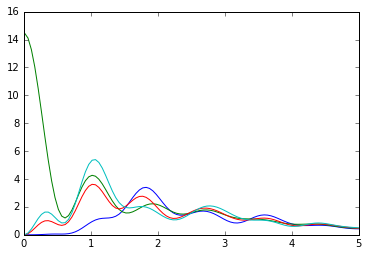

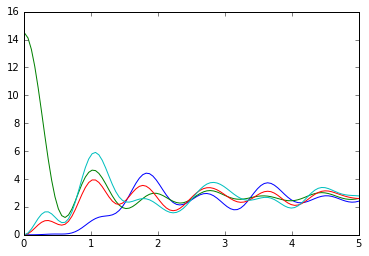

In [21]:
# all strucutres
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
spins0 = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3.)# AIAO order
spins1 = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])/np.sqrt(3.)# TITO order: in, in, out, out

spins2 = np.array([[0,-1,1],[0,1,1],[0,-1,-1],[0,1,-1]])/np.sqrt(2.)# gamma 5: spins in YZ plane 2//3, 1//4
#spins = np.array([[1,-1,0],[-1,1,0],[-1,-1,0],[1,1,0]])/np.sqrt(2.)# gamma 5: spins in XY plane 1//2 3//4
spins3 = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])/np.sqrt(2.)# PC order: spins in YZ plane 2//3, 1//4

all_spins = [spins0,spins1,spins2,spins3]
legs = ['AIAO','Spin ice',r'$\Gamma 5$','PC']

qs = np.linspace(0.01,5.0,100) # q in absolute unit
ffs = gdformfact(qs)

sffss = []
fig0, ax0 = plt.subplots()
fig1, ax1 = plt.subplots()
for i in [0,1,2,3]:
    spins = np.tile(all_spins[i], (4,1))
    print(spins)
    t = time.time()
    sfs = powder(10.44, atpos_uc, spins , qs)
    elapsed = time.time() - t
    print(elapsed)
    
    sffss.append(sfs)

    ax0.plot(qs,ffs*sfs*(7*8)*0.07265,label=legs[i])# convert to abs unit /N_ions * S(S+1) * 0.07265 / 4Pi * 2ions
    ax1.plot(qs,    sfs*(7*8)*0.07265,label=legs[i])# convert to abs unit /N_ions * S(S+1) * 0.07265 / 4Pi * 2ions


In [18]:
ax0.set_xlabel('$Q(\AA^-1)$')
ax0.set_ylabel('$I(barn)$')
#ax0.set_ylim([0,8])
ax0.legend()
ax0.text(3,3,'Powder average \n(one unit cell) \nwith formfactor')

ax1.set_xlabel('$Q(\AA^-1)$')
ax1.set_ylabel('$I(barn)$')
#ax1.set_ylim([0,10])
ax1.legend()
ax1.axhline(0.66667*(7*8)*0.07265,c='gray')
ax1.text(3,1,'Powder average \n(one unit cell) \nwithout formfactor')

fig0.savefig(r'D:\5_Neutron_Scattering\15_D7_ILL_Gd2Hf2O7_Feb2020/sf_pow_single_uc_aiao_si_pc_gamma5.pdf',
            bbox_inches="tight",verbose=True)
fig1.savefig(r'D:\5_Neutron_Scattering\15_D7_ILL_Gd2Hf2O7_Feb2020/sf_pow_single_uc_aiao_si_pc_gamma5_noFF.pdf',
            bbox_inches="tight",verbose=True)

In [23]:
sffss.append(qs)
sffss.append(ffs)
print(sffss)
sffss_q_ff = np.array(sffss)
np.savetxt(r'D:\2_Neutron_Scattering\2_D7_ILL_Gd2Hf2O7_Feb2020/sffss_q_ff_uc.txt',sffss_q_ff.T,header='AIAO, 2I2O, Gamma7, PC, Qs, Formfactor (per unit spin, cell=10.5\AA)', comments='')

[array([1.76650529e-08, 2.29127309e-05, 2.43448831e-04, 9.84252256e-04,
       2.53118331e-03, 4.93247783e-03, 7.88287715e-03, 1.07652978e-02,
       1.28682676e-02, 1.37298869e-02, 1.35011398e-02, 1.31940601e-02,
       1.46960761e-02, 2.04903060e-02, 3.31083699e-02, 5.44329191e-02,
       8.50336641e-02, 1.23740171e-01, 1.67616159e-01, 2.12408747e-01,
       2.53423023e-01, 2.86649314e-01, 3.09881650e-01, 3.23538382e-01,
       3.30941914e-01, 3.37927240e-01, 3.51803427e-01, 3.79851423e-01,
       4.27665403e-01, 4.97701005e-01, 5.88365835e-01, 6.93879909e-01,
       8.04970423e-01, 9.10284496e-01, 9.98247751e-01, 1.05900208e+00,
       1.08604351e+00, 1.07725185e+00, 1.03513878e+00, 9.66306327e-01,
       8.80265341e-01, 7.87876772e-01, 6.99726899e-01, 6.24724830e-01,
       5.69129715e-01, 5.36101391e-01, 5.25752467e-01, 5.35589886e-01,
       5.61187504e-01, 5.96932151e-01, 6.36724462e-01, 6.74573721e-01,
       7.05080962e-01, 7.23839430e-01, 7.27786003e-01, 7.15515134e-01,
     

## PC: tetra/unit cell, single crystal

In [5]:
%matplotlib inline

nQx, nQy = 101,101
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)
hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

# Single tetrahedra
# atpos_tetra = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
# spins = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])/np.sqrt(2.)# PC phase: spins in YZ plane 2//3, 1//4
# I1 = strfct_np(hkl, atpos_tetra, spins)
# spins = np.array([[1,-1,0],[-1,1,0],[1,1,0],[-1,-1,0]])/np.sqrt(2.)# PC phase: spins in XY plane 1//2 3//4
# I2 = strfct_np(hkl, atpos_tetra, spins)
# spins = np.array([[1,0,-1],[1,0,1],[-1,0,1],[-1,0,-1]])/np.sqrt(2.)# PC phase: spins in XZ plane 1//3, 2//4
# I3 = strfct_np(hkl, atpos_tetra, spins)

# Single unit cell
spins = np.array([[0,1,-1],[0,1,1],[0,-1,-1],[0,-1,1]])/np.sqrt(2.)# PC phase: spins in YZ plane 2//3, 1//4
I1 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[1,-1,0],[-1,1,0],[1,1,0],[-1,-1,0]])/np.sqrt(2.)# PC phase: spins in XY plane 1//2 3//4
I2 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[1,0,-1],[1,0,1],[-1,0,1],[-1,0,-1]])/np.sqrt(2.)# PC phase: spins in XZ plane 1//3, 2//4
I3 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))

I_average = (I1+I2+I3)/3

intensity2D = np.real(np.reshape(I_average,(nQx,nQy)).T)

intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))

# only plot Instrument largest Q range
print(X,Y)
Qlim = 4.0
Qmod = np.sqrt(2*X**2 + Y**2) # why not the one: Qmod = np.sqrt(2*x**2+y**2)
intensity2D = np.ma.masked_where(Qmod > Qlim, intensity2D)

pcol = plt.pcolormesh(X,Y,intensity2D.T,
                      cmap=plt.cm.jet,linewidth=0,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)
plt.axis([ -Qlim/1.414, Qlim/1.414,-Qlim, Qlim])
plt.axes().set_aspect(0.707)

plt.show()

NameError: name 'strfct_np' is not defined

## Spin ice summing up 6 domains

In [99]:
# Ｓｐｉｎ　ｉｃｅ　ｓｕｍ　ｏｖｅｒ　ｓｉｘ　ｄｏｍａｉｎｓ
# Use numpy

nQx, nQy = 101,101
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

# Single tetrahedron
# the two in two out single tetrhedra
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
#spins = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])# AIAO order

# spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])# TITO order: in, in, out, out
# ice0 = strfct_np(hkl, allpos,spins)
# spins = np.array([[-1,-1,-1],[1,1,-1],[-1,1,-1],[1,-1,-1]])# out out in in
# ice1 = strfct_np(hkl, allpos,spins)
# spins = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1]])# in, out, out, in
# ice2 = strfct_np(hkl, allpos,spins)
# spins = np.array([[-1,-1,-1],[-1,-1,1],[-1,1,-1],[-1,1,1]])# out, in, out,in
# ice3 = strfct_np(hkl, allpos,spins)
# spins = np.array([[1,1,1],[1,1,-1],[-1,1,-1],[-1,1,1]])# in out in out 
# ice4 = strfct_np(hkl, allpos,spins)
# spins = np.array([[-1,-1,-1],[-1,-1,1],[1,-1,1],[1,-1,-1]])#  out in out in
# ice5 = strfct_np(hkl, allpos,spins)

# Single unit cell
spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])# TITO order: in, in, out, out
ice0 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[-1,-1,-1],[1,1,-1],[-1,1,-1],[1,-1,-1]])# out out in in
ice1 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1]])# in, out, out, in
ice2 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[-1,-1,-1],[-1,-1,1],[-1,1,-1],[-1,1,1]])# out, in, out,in
ice3 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[1,1,1],[1,1,-1],[-1,1,-1],[-1,1,1]])# in out in out 
ice4 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))
spins = np.array([[-1,-1,-1],[-1,-1,1],[1,-1,1],[1,-1,-1]])#  out in out in
ice5 = strfct_np(hkl, atpos_uc, np.tile(spins, (4,1)))

spinIce = ice0+ice1+ice2+ice3+ice4+ice5
intensity2D = np.real(np.reshape(spinIce,(nQx,nQy)).T)
print(np.sum(intensity2D.imag))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


0.0


In [101]:
# Use Sympy
# Ｓｐｉｎ　ｉｃｅ　ｓｕｍ　ｏｖｅｒ　ｓｉｘ　ｄｏｍａｉｎｓ
# the two in two out single tetrhedra
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
#spins = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])# AIAO order

spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]])# TITO order: in, in, out, out
ice0 = pschhl(allpos,spins)
spins = np.array([[-1,-1,-1],[1,1,-1],[-1,1,-1],[1,-1,-1]])# out out in in
ice1 = pschhl(allpos,spins)
spins = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1]])# in, out, out, in
ice2 = pschhl(allpos,spins)
spins = np.array([[-1,-1,-1],[-1,-1,1],[-1,1,-1],[-1,1,1]])# out, in, out,in
ice3 = pschhl(allpos,spins)
spins = np.array([[1,1,1],[1,1,-1],[-1,1,-1],[-1,1,1]])# in out in out 
ice4 = pschhl(allpos,spins)
spins = np.array([[-1,-1,-1],[-1,-1,1],[1,-1,1],[1,-1,-1]])#  out in out in
ice5 = pschhl(allpos,spins)

spinIce = ice0+ice1+ice2+ice3+ice4+ice5

magstrf= sp.lambdify( (h,k,l), spinIce, modules=['numpy', 'sympy']) # vectorize the function

nQx, nQy = 101,101
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T
intensity2D = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T
#print intensity2D

<string>:2: RuntimeWarning: invalid value encountered in true_divide


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


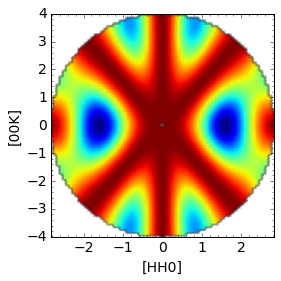

In [105]:
print(intensity2D)

Qlim = 4.0
Qmod = np.sqrt(2*X**2 + Y**2) # why not the one: Qmod = np.sqrt(2*x**2+y**2)
intensity2D = np.ma.masked_where(Qmod > Qlim, intensity2D)

pcol = plt.pcolormesh(X,Y,intensity2D,
                      cmap=plt.cm.jet,linewidth=0,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.axis([ -Qlim/1.414, Qlim/1.414,-Qlim, Qlim])
plt.axes().set_aspect(0.707)
plt.show()

In [145]:
# Ｓｐｉｎ　ｉｃｅ　cohenrent ｓｕｍ　ｏｖｅｒ　ｓｉｘ　ｄｏｍａｉｎｓ: zero intensity
# the two in two out single tetrhedra
nAtom = 16
allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25],
                   [0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25],
                   [0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25],
                   [0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25] ]) # spin positions
#spins = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])# AIAO order

spins = np.array([[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1],
                 [-1,-1,-1],[1,1,-1],[-1,1,-1],[1,-1,-1],
                 [1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1],
                 [-1,-1,-1],[-1,-1,1],[-1,1,-1],[-1,1,1],
                 [1,1,1],[1,1,-1],[-1,1,-1],[-1,1,1],
                 [-1,-1,-1],[-1,-1,1],[1,-1,1],[1,-1,-1]])# TITO order: in, in, out, out

spinIce = pschhl(allpos,spins)
print sp.simplify(spinIce)

0


## Two up to  down： hhl plane

[[ 0.5  0.5  0.5]
 [-0.5 -0.5  0.5]
 [ 0.2  0.2  0. ]
 [-0.2 -0.2  0. ]]


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in multiply
  """
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """


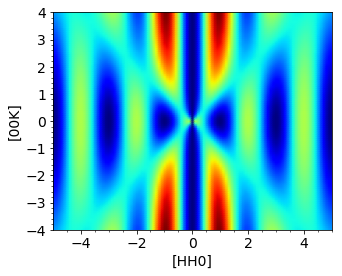

In [549]:
# Ｔｗｏ－ｕｐ－ｔｗｏ－ｄｏｗｎ：　ｈｈｌ　ｐｌａｎｅ

allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
spins = np.array([[-1/2.,1/2.,0],[-1/2.,1/2.,0],[1,-1,0],[1,-1,0]])# up up down down with respect to [1-10]
# In the [HHL] for polarized neutron SF channel： only spin components in the [hhl] plane
angle, amp = 0./180*np.pi, 0.2
ca, sa = np.cos(angle), np.sin(angle)
# two-in (inplane ice), two-out (out-of-plane atom) 
spins = np.array([[1/2.,1/2.,1/2.],[-1/2.,-1/2.,1/2.],[amp*ca,amp*ca,amp*sa],[-amp*ca,-amp*ca,amp*sa]])
#spins = np.array([[-1/2.,-1/2.,-1/2.],[-1/2.,-1/2.,1/2.],[-amp*ca,-amp*ca,-amp*sa],[-amp*ca,-amp*ca,amp*sa]])# 
print spins
magstrf= sp.lambdify((h,k,l), strfct(allpos,spins), modules=['numpy', 'sympy']) # vectorize the function

nQx, nQy, nQz = 101,101,101
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity0 = np.reshape(magstrf(hkl[:,0],hkl[:,1],hkl[:,2]).real,(nQx,nQy)).T
intensity2D = intensity0
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D,
                      cmap=plt.cm.jet,linewidth=0,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

In [539]:
np.arccos(-1/3.)/np.pi*180/2

54.735610317245346

## Heisenburg AFM pyrochlore

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return 32*(cos((1/2)*pi*h) - cos((1/2)*pi*l))**2*sin((1/2)*pi*h)**2/(-4*cos(pi*h)*cos(pi*l) - cos(2*pi*h) + 5)


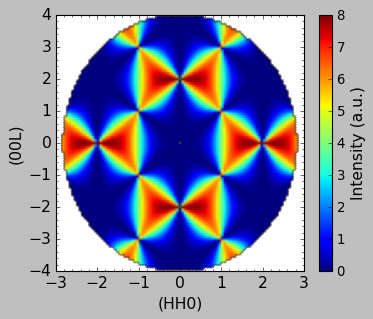

In [5]:
# Calcualte the cross section in the [hhl] plane of the Heisenburg AFM pyrochlore 
# equation got from: DOI: 10.1103/PhysRevLett.93.167204
h, l= sp.symbols('h l',real=True) # hhl plane, so only two symbol shows in the equation

q = sp.Matrix([h,h,l])
qnormed = q/q.norm()
qabs = 2*sp.pi*q.norm()/10.44 # Q in absolute unit A^-1

heisen = 32*gdformfactSP(qabs)*(sp.cos(2*sp.pi*h/4)-sp.cos(2*sp.pi*l/4))**2 * sp.sin(2*sp.pi*h/4)**2/ \
        (5 - sp.cos(2*sp.pi*h)-4*sp.cos(2*sp.pi*h/2)*sp.cos(2*sp.pi*l/2))
heisen = 32*(sp.cos(2*sp.pi*h/4)-sp.cos(2*sp.pi*l/4))**2 * sp.sin(2*sp.pi*h/4)**2/ \
        (5 - sp.cos(2*sp.pi*h)-4*sp.cos(2*sp.pi*h/2)*sp.cos(2*sp.pi*l/2))
    
magstrf= sp.lambdify( (h,l),heisen,modules=['numpy', 'sympy']) # vectorize the function

nQx, nQy = 101,101
x = np.linspace(-3,3,nQx,endpoint=True)
y = np.linspace(-4,4,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((X.ravel(), Y.ravel())).T
Z = np.reshape(magstrf(hkl[:,0],hkl[:,1]).real,(nQx,nQy))
np.savetxt(r'D:\2_Neutron_scattering\0_SpinVert/magStr_pyrohlore_AFM.txt',Z)

# calculate with the reachable region of the instrument
Qlim = 4 # Ki used
Qmod = np.sqrt(2*X**2+Y**2)
Zm = np.ma.masked_where(Qmod > Qlim, Z)

# Plot
plt.figure(figsize=[5,4])
pcol = plt.pcolormesh(x,y,Zm,vmin=0,vmax=8,
                      cmap=plt.cm.jet,linewidth=0,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('(HH0)',size=14)
plt.ylabel('(00L)',size=14)

plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

# set colorbar and its properties
cb = plt.colorbar() # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
cb.ax.tick_params(labelsize=12)
#plt.savefig(r'D:\7_Writing\0_my_phd_thesis\Figures\gd_diffuse/str_factor_dipolar.pdf',bbox_inches="tight",verbose=True)
plt.show()

# Calculate the structure factor of single AFM tetrahedra

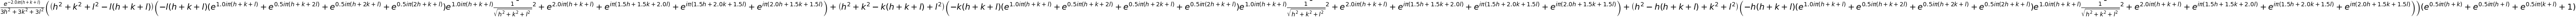

In [24]:
# For Tb2Ti2O7 including the neutron sentatity to the Q_perp

allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
spins = sp.MatrixSymbol('s',4,3)
spins = sp.Matrix(spins)
spins = sp.Matrix([[1,1,1],[1,1,1],[1,1,1],[1,1,1]])/sp.sqrt(3)# TITO order: in, in, out, out

#magstrf= sp.lambdify((h,k,l), strfct(allpos,spins), modules=['numpy', 'sympy']) # vectorize the function

h, k, l= sp.symbols('h k l',real=True)
q = sp.Matrix([h,k,l])
qnormed = q/q.norm()

Sx, Sy, Sz = 0.,0.,0.
for i in np.arange(len(allpos)):
    Sx = Sx + spins[i,0]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sy = Sy + spins[i,1]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sz = Sz + spins[i,2]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))

Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.
Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed # neutron scattering
ss = (Sperp.T*Sperp.conjugate())[0,0]

sp.init_printing(use_latex="matplotlib")
sp.init_printing(use_latex=True)
#sp.init_printing()

sp.simplify(ss)


In [29]:
# Without including nuetron senstivity to Q_perp
'''
Just calculate the structure factor in the way like nuclear structure factor
S(K) = sum_i s_i exp(i 2pi k.r_i)
S(K).S(K)* = sum_{i,j} s_i.s_j exp[i 2pi k.r_{ij}] /4

with assuming <s_i.s_j> = -1/3 for i!=j (why? sum over many different AFM tetrahedra)
           = [4 - 1/3 sum_{i<j} 2cos(2pi k.r_ij)]
           = 4 - 4/3 (cos(0.5pih...)
           
the second terms is calculated here.
Excatly the same result with the Tb2Ti2O7 paper (PRB, 64, 224416)
'''

allpos = np.array([[0,0,0],[0.25,0.25,0],[0.25,0.,0.25],[0.,0.25,0.25]]) # spin positions
nb_of_at = len(allpos)

h, k, l= sp.symbols('h k l',real=True)
q = sp.Matrix([h,k,l])

# sums = 0
# for i in np.arange(len(allpos)):
#     for j in np.arange(len(allpos)):
#         sums = sums + sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]-allpos[j,:]))
# sp.simplify(sums)

sums = 0
for i in np.arange(0,nb_of_at):
    for j in np.arange(i+1,nb_of_at):
        sums = sums + sp.cos(2 * sp.pi * q.dot(allpos[i,:]-allpos[j,:]))
sp.simplify(sums)

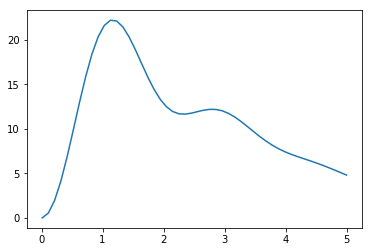

In [584]:
# Ｐｏｗｄｅｒ　ａｖｅｒａｎｇｅｄ　ｓｔｒｕｃｔｕｒｅ　ｆａｃｔｏｒ　ｆｏｒ　ｐｙｒｏｃｈｌｏｒｅ　ＡＦＭ
from scipy import integrate

def pwAFMstrff(q,lattice): 
    def strff(th,phi):
        [h,k,l] = np.array([q*np.sin(th)*np.cos(phi), q*np.sin(th)*np.sin(phi), q*np.cos(th)])/(2*np.pi/lattice) 
        return 1. - 1.0/3*(np.cos(0.5*np.pi*h)*np.cos(0.5*np.pi*k)+
                           np.cos(0.5*np.pi*h)*np.cos(0.5*np.pi*l)+
                           np.cos(0.5*np.pi*k)*np.cos(0.5*np.pi*l))
    
    return integrate.nquad(strff, [[0, np.pi],[0, 2*np.pi]])[0] #/ (4*np.pi * q**2) 
            # No normalization because the area is multiplicity factor!!?? How about the Loritz factor?

vfunc = np.vectorize(pwAFMstrff,excluded=['lattice'])
qs = np.linspace(0.01,5.0,50)

sfs = tbformfactNP(qs) * vfunc(qs,10.4)

plt.plot(qs,sfs)
plt.show()

# Calculate the mapping of dipolar correlations in AFM (CL Henley)
Problems solved:
    
1. the equations for H and |H| in the paper by CL Henley is not working. <br> 
   Follow meaning of the H and |H| we can calcualte them in the directly way <br> 
   But LA.ling.inv fonction not allow a calculation at the [HKL] where hkl are integers 
2. For Heisenburg AFM, M=[1,1,1,1] for spin-non-flip? <br>
   For reproducing the one for Tb$_2$Ti$_2$O$_7$, <br>
   if put M = [1,0.2,1,0.2] (1: for out-of-plane atoms forming bond along [1-10], 0.2 for in-plane atoms) <br>
   How is it justified?
3. For Spin ice, M_axes = Us which is all out, the corrleaations of $t_m$ contains $+/-$ sign making ice spin config. <br>
   M = norm(M_perpQ_perpPo) for SF and  norm(M_perpQ_paraPo) 
4. Search for a spin configuration for Tb$_2$T$_2$O$_7$:<br>
    Spin ice + 2up2down + Heisenburg<br>
    Splayed ice    
    PC phase

General idea:<br>
    two-up-two-down (parallel with [1-10]) alway give a pattern in the SNF channel <br>
    Set the M_axes has zero polarization, e.g. the one for spin ice <br>
    Probably there thoery used here is suitable for Tb?

In [3]:
# Use Sympy
# Atom positions on a tetrhedra
Us = sp.Matrix([[1/4.,1/4.,1/4.],
                [1/4.,-1/4.,-1/4.],
                [-1/4.,-1/4.,1/4.],
                [-1/4.,1/4.,-1/4.]])

h, k, l= sp.symbols('h k l',real=True)
Q = sp.Matrix([h,k,l])
qnormed = Q/Q.norm()

Ek = sp.Matrix([sp.exp(-1/2.* 2*sp.pi *sp.I*Q.dot(Us[0,:])),
                sp.exp(-1/2.* 2*sp.pi *sp.I*Q.dot(Us[1,:])),
                sp.exp(-1/2.* 2*sp.pi *sp.I*Q.dot(Us[2,:])),
                sp.exp(-1/2.* 2*sp.pi *sp.I*Q.dot(Us[3,:])) ])

Eks = sp.conjugate(Ek)

E = sp.Matrix([Ek.T,Eks.T]).T
Es = sp.conjugate(E).T

Es*E

# H = sp.simplify(
#            sum([sp.exp(2*sp.pi *sp.I *Q.dot(Us[0,:])),
#                 sp.exp(2*sp.pi *sp.I *Q.dot(Us[1,:])),
#                 sp.exp(2*sp.pi *sp.I *Q.dot(Us[2,:])),
#                 sp.exp(2*sp.pi *sp.I *Q.dot(Us[3,:]))])
#                )/4.

# H = sp.cos(2*sp.pi *h /4.) * sp.cos(2*sp.pi *k /4.) * sp.cos(2*sp.pi *l /4.) - \
#          sp.I* sp.sin(2*sp.pi *h /4.) * sp.sin(2*sp.pi *k /4.) * sp.sin(2*sp.pi *l /4.)
    
# Hs = sp.conjugate(H)

# # #EsE = 4* sp.Matrix([[1, H],[Hs,1]])
# EsEr = 1./4 * ( 1 - H*Hs )**-1 * sp.Matrix([[1, -Hs], [-H,1]])

# M = sp.Matrix([1,1,1,1])
# # #M

# #E.dot(EsEr)
# tk2 = 2* M.T * ( sp.Identity(4)- E*(EsEr)*Es.T ) * M
# tk2

Matrix([
[                                                                                                                                                                              4, exp(2.0*I*pi*(-0.25*h - 0.25*k + 0.25*l)) + exp(2.0*I*pi*(-0.25*h + 0.25*k - 0.25*l)) + exp(2.0*I*pi*(0.25*h - 0.25*k - 0.25*l)) + exp(2.0*I*pi*(0.25*h + 0.25*k + 0.25*l))],
[exp(-2.0*I*pi*(0.25*h + 0.25*k + 0.25*l)) + exp(-2.0*I*pi*(0.25*h - 0.25*k - 0.25*l)) + exp(-2.0*I*pi*(-0.25*h + 0.25*k - 0.25*l)) + exp(-2.0*I*pi*(-0.25*h - 0.25*k + 0.25*l)),                                                                                                                                                                           4]])

In [4]:
# Use Numpy
# Pyrochlore antiferromagnet
from numpy.linalg import inv

Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])

M = np.array([1.,1.,1.,1.]).T # a column vector: 2up2down with equal spins
#M = np.array([0.2,1,0.2,1]).T # a column vector： 2up2down: out-of-plane 2&4 large spin, in-plane 1&3 small spin

def dipolarC(h,k,l):
    Q = np.array([h,k,l])
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranp

# The quaatinos in the paper not working
#     H =     np.cos(2*np.pi *h /4.) * np.cos(2*np.pi *k /4.) * np.cos(2*np.pi *l /4.) - \
#         1.j*np.sin(2*np.pi *h /4.) * np.sin(2*np.pi *k /4.) * np.sin(2*np.pi *l /4.)    
#     Hs = np.conj(H)

#     HH = 0.25 * ( 1. + np.cos(2*np.pi *k /2.) * np.cos(2*np.pi *l /2.) +
#                        np.cos(2*np.pi *h /2.) * np.cos(2*np.pi *k /2.) +
#                        np.cos(2*np.pi *h /2.) * np.cos(2*np.pi *l /2.) )
    
#     HH = np.absolute(H)**2
    
    #EsE = 4. * np.array([[1., H], [Hs,1.]])
    #EsEr = 1./4 * ( 1. - HH)**-1 * np.array([[1., Hs], [-Hs,1.]])  
    
    EsEr = inv(Es.dot(E)) #!!!!!!! singular for the integer HKL, so aviod input that type of HKL!!!!!!!!
    
    tk2 = 2.* M.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(M)
    return tk2.real

print(dipolarC(0.5,1.5,1.5))

# Fucntions with hkl and M as input
def dipolarCM(h,k,l,M):
    Q = np.array([h,k,l])
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranp
    
    EsEr = inv(Es.dot(E)) #!!!!!!! singular for the integer HKL, so aviod input that type of HKL!!!!!!!!
    
    tk2 = 2.* M.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(M)
    return tk2.real

5.333333333333334


In [5]:
# Calculate [HHL] plane
nQx, nQy = 62,82
x = np.linspace(-3,3,nQx,endpoint=True)
y = np.linspace(-4,4,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

# Different Ms for two up two down for TbTiO: now not used because M = np.array([0.2,1,0.2,1]).T is correct (see above)
# Ms = np.array([[1.0, 1.0, 0.2, 0.2],
#                [1.0, 0.2, 1.0, 0.2],
#                [0.2, 1.0, 1.0, 0.2],
#                [0.2, 0.2, 1.0, 1.0]])

intensity_AFM = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity_AFM[i] = dipolarC(hkl[i,0],hkl[i,1],hkl[i,2])
    
    # Try for Tb2Ti2O7: with different degenerate Ms
#     intensity[i] = dipolarCM(hkl[i,0],hkl[i,1],hkl[i,2],Ms[0,:])+ dipolarCM(hkl[i,0],hkl[i,1],hkl[i,2],Ms[1,:])+ \
#                    dipolarCM(hkl[i,0],hkl[i,1],hkl[i,2],Ms[2,:])+ dipolarCM(hkl[i,0],hkl[i,1],hkl[i,2],Ms[3,:])


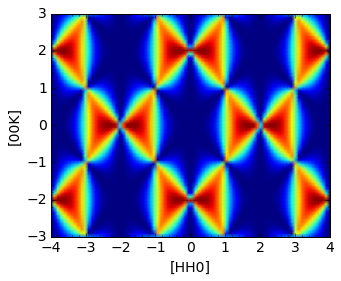

In [6]:
# Plot [HHL] plane
%matplotlib inline
intensity2D = np.reshape(intensity_AFM,[nQy,nQx])

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

In [17]:
#  Ｃａｌｃｕｌａｔｅｄ　ｔｈｅ　ｐｏｌａｒｉｚｅｄ－ｎｅｕｔｒｏｎ　ｓｃａｔｔｅｒｉｎｇ　ｏｆ　ｓｐｉｎ　ｉｃｅ　
'''
Use Us as the psuedospins whose correlations are known;
Project the ice cinfiguration according to the expermental geometry
'''
from numpy.linalg import inv, norm

# Position of the spin on the tetrahedra which is used as the psuedospin for spin ice
Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])

M = np.array([[1/4., 1/4., 1/4.], # Same with Us
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])

#M = np.multiply(M.T,[1,-1,1,-1]).T # check AIAO order: different order of the sign give different patterns

# Neutron polarization dirction [1-10]
po = np.array([1,-1,0])
ponormed = po / norm(po)

def dipolarC0(h,k,l):
    Q = np.array([h,k,l])
    # Ek phase factor on the tetrahedron
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    
    # E and E^star
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranpo
    
    EsEr = inv(Es.dot(E))
    
    # M_perpQ : project the [111] Magnetic moments according to \perp Q 
    qnormed = Q / norm(Q)
    Mq =  M - M.dot(qnormed.reshape(3,-1)).dot(qnormed.reshape(1,-1))# reshape 
    
    # (spin flip) M_perpQ_perpP and the magnitude with sign! 
    Mqp = Mq - Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1))# reshape for matmul
    # Mqp (3by4) contains the four moments perpendicular both to q and p, and they are paralell or antiparalell 
    Mm = Mqp.dot(np.cross(qnormed,ponormed))# do not use Mm = norm(Mqp,axis=1) which remove the sign of Mqp 
    
    # (spin non-flip) M_perpQ_paraP (should give no signal)
    #Mqp = Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    #Mm = Mqp.dot(ponormed)
    
    tk2 = 2.* Mm.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(Mm)
    
    return tk2.real #np.sum(tk2.real) #np.sum(np.diag(tk2.real))

#print dipolarC0(0.,0.,2.5),dipolarC0(1.5,1.5,1.5)

# Calculated the [HHL] plane
nQx, nQy = 62,82
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity_ice = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity_ice[i] = dipolarC0(hkl[i,0],hkl[i,1],hkl[i,2])
    

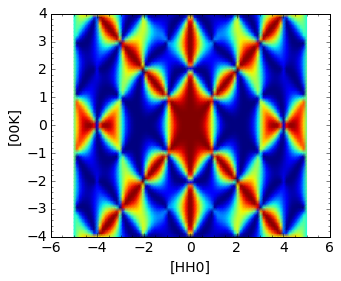

In [18]:
intensity = intensity_ice # -0.*intensity_AFM 

intensity2D = np.reshape(intensity,[nQy,nQx])
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
#pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

0.10666666666666665


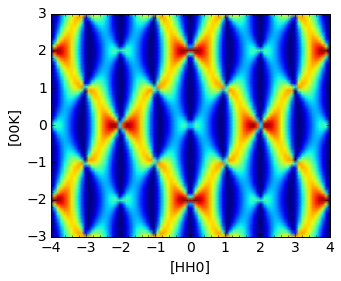

In [9]:
#  Ｃａｌｃｕｌａｔｅｄ　ｔｈｅ　ｐｏｌａｒｉｚｅｄ－ｎｅｕｔｒｏｎ　ｓｃａｔｔｅｒｉｎｇ　ｏｆ　TbTiO
# Two up two down
from numpy.linalg import inv, norm

# Position of the spin on the tetrahedra which is used as the psuedospin for spin ice
Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])
# two up two down: large m at 2&4 perp [HHL] along neutron polarization; samll m at 1&3 in the [HHL] plane
scale = np.array([0.2, 1.0, 0.2, 1.0]).T # atom 1 and 3 is in-plane whose moment should be small, atom 2 and 4 is out-of-plane 
Ms = np.array([[1/4.,-1/4.,0.],
               [1/4.,-1/4.,0.],
               [1/4.,-1/4.,0.],
               [1/4.,-1/4.,0.]]) 
Ms = np.multiply(Ms.T, scale).T
#print Ms

# Neutron polarization dirction [1-10]
po = np.array([1.,-1.,0.])
ponormed = po / norm(po)

def dipolarC0(h,k,l):
    Q = np.array([h,k,l])
    # Ek phase factor on the tetrahedron
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    
    # E and E^star
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranpo
    
    EsEr = inv(Es.dot(E))
    
    # M_perpQ : project the [111] Magnetic moments according to \perp Q 
    qnormed = Q / norm(Q)
    Mq =  Ms - Ms.dot(qnormed.reshape(3,-1)).dot(qnormed.reshape(1,-1))  
    #print Mq
    # M_perpQ_perpP (spin flip) and the magnitude with sign! 
    #Mqp = Mq - Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    #Mm = Mqp.dot(np.cross(qnormed,ponormed))# do not use Mm = norm(Mqp,axis=1) which remove the sign of Mqp
    
    # M_perpQ_paraP (spin non-flip) (should give not signal)
    Mqp = Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    Mm = Mqp.dot(ponormed)
    #print Mqp
    tk2 = 2.* Mm.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(Mm)
    
    return tk2.real #np.sum(tk2.real) #np.sum(np.diag(tk2.real))

print(dipolarC0(1.5,1.5,1.5))

nQx, nQy = 62,82
x = np.linspace(-3,3,nQx,endpoint=True)
y = np.linspace(-4,4,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity[i] = dipolarC0(hkl[i,0],hkl[i,1],hkl[i,2])


intensity2D = np.reshape(intensity,[nQy,nQx])
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

0.6066666666666665


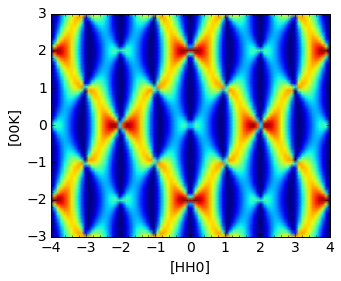

In [11]:
#  Ｃａｌｃｕｌａｔｅｄ　ｔｈｅ　ｐｏｌａｒｉｚｅｄ－ｎｅｕｔｒｏｎ　ｓｃａｔｔｅｒｉｎｇ　ｏｆ　TbTiO
# Use the splayed spin ice
# Spin ice + 2up2down + Heisenburg
from numpy.linalg import inv, norm

# Position of the spin on the tetrahedra which is used as the psuedospin for spin ice
Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])
# two up two down: large m at 2&4 perp [HHL] along neutron polarization; samll m at 1&3 in the [HHL] plane
scale = np.array([0.2, 1.0, 0.2, 1.0]).T # atom 1 and 3 is in-plane, atom 2 and 4 is out-of-plane 
M2u2d = np.array([[1/4.,-1/4.,0.],
                  [1/4.,-1/4.,0.],
                  [1/4.,-1/4.,0.],
                  [1/4.,-1/4.,0.]]) # Heisenburg term
M2u2dls = np.multiply(M2u2d.T, scale).T # two large two small

Max   = np.array([[0,0,0.25],
                  [0,0,0.25],
                  [0,0,0.25],
                  [0,0,0.25]]) # uniaxial terms

Ms =  Us +  M2u2dls + M2u2d*0

# Neutron polarization dirction [1-10]
po = np.array([1,-1,0])
ponormed = po / norm(po)

def dipolarC0(h,k,l):
    Q = np.array([h,k,l])
    # Ek phase factor on the tetrahedron
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    
    # E and E^star
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranpo
    
    EsEr = inv(Es.dot(E))
    
    # M_perpQ : project the [111] Magnetic moments according to \perp Q 
    qnormed = Q / norm(Q)
    Mq =  Ms - Ms.dot(qnormed.reshape(3,-1)).dot(qnormed.reshape(1,-1))  
    
    # M_perpQ_perpP (spin flip) and the magnitude with sign! 
    #Mqp = Mq - Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    #Mm = Mqp.dot(np.cross(qnormed,ponormed))# do not use Mm = norm(Mqp,axis=1) which remove the sign of Mqp
    
    # M_perpQ_paraP (spin non-flip) (should give not signal)
    Mqp = Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    Mm = Mqp.dot(ponormed)
    
    tk2 = 2.* Mm.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(Mm)
    
    return tk2.real #np.sum(tk2.real) #np.sum(np.diag(tk2.real))

print(dipolarC0(1.5,1.5,1.5))

nQx, nQy = 62,82
x = np.linspace(-3,3,nQx,endpoint=True)
y = np.linspace(-4,4,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity[i] = dipolarC0(hkl[i,0],hkl[i,1],hkl[i,2])


intensity2D = np.reshape(intensity,[nQy,nQx])
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

0.03555555555555557


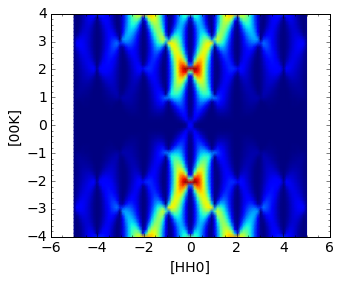

In [13]:
#  Ｃａｌｃｕｌａｔｅｄ　ｔｈｅ　ｐｏｌａｒｉｚｅｄ－ｎｅｕｔｒｏｎ　ｓｃａｔｔｅｒｉｎｇ　ｏｆ　TbTiO
# Use the splayed spin ice 
from numpy.linalg import inv, norm

# Position of the spin on the tetrahedra which is used as the psuedospin for spin ice
Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])

scale = np.array([0.2, 1.0, 0.2, 1.0]).T # atom 1 and 3 is in-plane, atom 2 and 4 is out-of-plane 

M2u2dls = np.multiply(M2u2d.T, scale).T # two large two small

Max0   = np.array([[0,0,0.25],
                  [0,0,0.25],
                  [0,0,0.25],
                  [0,0,0.25]]) # uniaxial terms

Max1   = np.array([[0,0,0.25],
                  [0,0,-0.25],
                  [0,0,0.25],
                  [0,0,-0.25]]) # uniaxial terms

Mhei = np.array([[0., 1/4., -1/4.],
               [0., 1/4., -1/4.],
               [0., 1/4., 1/4.],
               [0., 1/4., 1/4.]])

Moff0 = np.array([[0., 0.,0],
               [1/4., 1/4.,0],
               [0., 0., 0],
               [1/4., 1/4.,0]])

Moff1 = 0.2*np.array([[1/4., 1/4.,0],
                  [0., 0., 0],
                  [1/4., 1/4.,0],
                  [0., 0.,0],])

Ms =  Moff0+Moff1# 0.5*Max# - 0.2* Mhei#  M2u2dls + M2u2d*

# Neutron polarization dirction [1-10]
po = np.array([1,-1,0])
ponormed = po / norm(po)

def dipolarC0(h,k,l):
    Q = np.array([h,k,l])
    # Ek phase factor on the tetrahedron
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    
    # E and E^star
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranpo
    
    EsEr = inv(Es.dot(E))
    
    # M_perpQ : project the [111] Magnetic moments according to \perp Q 
    qnormed = Q / norm(Q)
    Mq =  Ms - Ms.dot(qnormed.reshape(3,-1)).dot(qnormed.reshape(1,-1))  
    
    # M_perpQ_perpP (spin flip) and the magnitude with sign! 
    Mqp = Mq - Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    Mm = Mqp.dot(np.cross(qnormed,ponormed))# do not use Mm = norm(Mqp,axis=1) which remove the sign of Mqp
    
    # M_perpQ_paraP (spin non-flip) (should give not signal)
    #Mqp = Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    #Mm = Mqp.dot(ponormed)
    
    tk2 = 2.* Mm.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(Mm)
    
    return tk2.real #np.sum(tk2.real) #np.sum(np.diag(tk2.real))

print(dipolarC0(1.5,1.5,1.5))

nQx, nQy = 62,82
x = np.linspace(-4,4,nQx,endpoint=True)
y = np.linspace(-5,5,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity[i] = dipolarC0(hkl[i,0],hkl[i,1],hkl[i,2])


intensity2D = np.reshape(intensity,[nQy,nQx])
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

0.16666666666666666


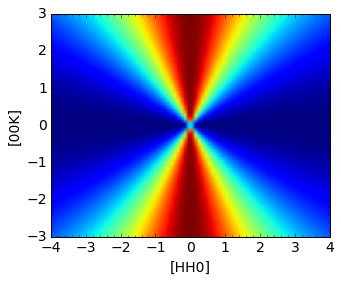

In [14]:
#  Ｃａｌｃｕｌａｔｅｄ　ｔｈｅ　ｐｏｌａｒｉｚｅｄ－ｎｅｕｔｒｏｎ　ｓｃａｔｔｅｒｉｎｇ　ｏｆ　TbTiO
# Try PC phase
from numpy.linalg import inv, norm

# Position of the spin on the tetrahedra which is used as the psuedospin for spin ice
Us = np.array([[1/4., 1/4., 1/4.],
               [1/4.,-1/4.,-1/4.],
               [-1/4.,-1/4.,1/4.],
               [-1/4.,1/4.,-1/4.]])
# atom 1 and 3 is in-plane, atom 2 and 4 is out-of-plane 
# PC phase spins in XY plane
Ms = np.array([[ 1/4., -1/4., 0],
               [-1/4., -1/4., 0],
               [-1/4.,  1/4., 0],
               [ 1/4.,  1/4., 0]])
# PC phase spins in YZ plane 1//2,3//4
# Ms = np.array([[0.,  1/4., -1/4.],
#                [0., -1/4.,  1/4.],
#                [0.,  1/4.,  1/4.],
#                [0., -1/4., -1/4.]])
# PC phase spins in XZ plane 1//4,2//3
# Ms = np.array([[ 1/4., 0, -1/4.],
#                [-1/4., 0, -1/4.],
#                [ 1/4., 0,  1/4.],
#                [-1/4., 0,  1/4.]])

# PC phase spin along the X direction of the local frame defined 
# Ms = np.array([[0., 1/4., 1/4.], # out of plane
#                [0., 1/4., -1/4.], # in plane
#                [0., 1/4., 1/4.], # out
#                [0., -1/4., 1/4.]]) # in

# Ms =  2*Us +  Ms

# Neutron polarization dirction [1-10]
po = np.array([1,-1,0])
ponormed = po / norm(po)

def dipolarC0(h,k,l):
    Q = np.array([h,k,l])
    # Ek phase factor on the tetrahedron
    Ek = np.array( [np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[0,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[1,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[2,:])),
                    np.exp(-1/2.* 2*np.pi *1.j *Q.dot(Us[3,:])) ])
    #print Ek
    
    # E and E^star
    E = np.vstack([Ek, np.conj(Ek)]).T # 4 by 2 matrix
    Es = np.conj(E).T # conj + tranpo
    
    EsEr = inv(Es.dot(E))
    
    # M_perpQ : project the [111] Magnetic moments according to \perp Q 
    qnormed = Q / norm(Q)
    Mq =  Ms - Ms.dot(qnormed.reshape(3,-1)).dot(qnormed.reshape(1,-1))  
    
    # M_perpQ_perpP (spin flip) and the magnitude with sign! 
    Mqp = Mq - Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    Mm = Mqp.dot(np.cross(qnormed,ponormed))# do not use Mm = norm(Mqp,axis=1) which remove the sign of Mqp
    
    # M_perpQ_paraP (spin non-flip) (should give not signal)
    #Mqp = Mq.dot(ponormed.reshape(3,-1)).dot(ponormed.reshape(1,-1)) 
    #Mm = Mqp.dot(ponormed)
    
    tk2 = 2.* Mm.T.dot( np.identity(4)- E.dot(EsEr).dot(Es) ).dot(Mm)
    
    return tk2.real #np.sum(tk2.real) #np.sum(np.diag(tk2.real))

print(dipolarC0(1.5,1.5,1.5))

nQx, nQy = 62,82
x = np.linspace(-3,3,nQx,endpoint=True)
y = np.linspace(-4,4,nQy,endpoint=True)
X, Y = np.meshgrid(x, y)

hkl = np.vstack((Y.ravel(), Y.ravel(), X.ravel())).T

intensity = np.zeros(len(hkl))
for i in np.arange(len(hkl)):
    intensity[i] = dipolarC0(hkl[i,0],hkl[i,1],hkl[i,2])


intensity2D = np.reshape(intensity,[nQy,nQx])
intensity2D[np.isnan(intensity2D)]=0

fig = plt.figure(figsize=(5,4))
pcol = plt.pcolormesh(y,x,intensity2D.T, cmap=plt.cm.jet,rasterized=True,shading='gouraud')
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00K]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.show()

# Calcualte the structure factor of the AIAO order

In [6]:
###read the file constaining spins and atom positions
fpath='D:/5_Neutron Scattering/3_D20_ILL_Dec2014/mag_str_atom.txt'
data = np.genfromtxt(fpath, dtype=None)
#print data

allpos = np.zeros([16,3])
spins = np.zeros([16,3])
for i in np.arange(data.shape[1]):
    allpos[i,:] = data[3:,i].T
    spins[i,:] = data[0:3,i].T/2.5980762
print(allpos, spins)

[[0.5  0.5  0.5 ]
 [0.5  0.25 0.25]
 [0.75 0.   0.25]
 [0.75 0.75 0.5 ]
 [0.25 0.5  0.25]
 [0.   0.75 0.25]
 [0.   0.   0.5 ]
 [0.25 0.25 0.5 ]
 [0.   0.5  0.  ]
 [0.   0.25 0.75]
 [0.25 0.   0.75]
 [0.25 0.75 0.  ]
 [0.75 0.5  0.75]
 [0.5  0.75 0.75]
 [0.5  0.   0.  ]
 [0.75 0.25 0.  ]] [[ 1.  1.  1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]]


In [7]:
h, k, l, m, n = sp.symbols('h k l m n',real=True)
q = sp.Matrix([h,k,l])
qnormed = q/q.norm()
#print qnormed[1]
Sx, Sy, Sz = 0.,0.,0.
for i in np.arange(16):
    Sx = Sx + spins[i,0]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sy = Sy + spins[i,1]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))
    Sz = Sz + spins[i,2]*sp.exp(2 * sp.pi * sp.I * q.dot(allpos[i,:]))

# Method 1
Sqvec = sp.Matrix([Sx,Sy,Sz]) #the FT of the magnetic str.

# Method 2: also works
Sxx = (1-qnormed[0]**2)*Sx*Sx.conjugate()
Syy = (1-qnormed[1]**2)*Sy*Sy.conjugate()
Szz = (1-qnormed[2]**2)*Sz*Sz.conjugate()

Sxy = (0-qnormed[0]*qnormed[1])*Sx*Sy.conjugate()
Sxz = (-qnormed[0]*qnormed[2])*Sx*Sz.conjugate()

Syx = (0-qnormed[1]*qnormed[0])*Sy*Sx.conjugate()
Syz = (0-qnormed[1]*qnormed[2])*Sy*Sz.conjugate()

Szx = (0-qnormed[2]*qnormed[0])*Sz*Sx.conjugate()
Szy = (0-qnormed[2]*qnormed[1])*Sz*Sy.conjugate()

Sqvec1 = sp.Matrix([[Sxx,Sxy,Sxz],[Syx,Syy,Syz],[Szx,Szy,Szz]]) # for testing
# Sxx = (1-qnormed[0]**2)*sp.Abs(Sxx)**2#*Sxx.conjugate() # not corrected
# Syy = (1-qnormed[1]**2)*sp.Abs(Syy)**2#*Syy.conjugate()
# Szz = (1-qnormed[2]**2)*sp.Abs(Szz)**2#*Szz.conjugate()


#clc the 2theta, q in A^-1, and lorizain factor
const = 0.07265 #*2**2*7/2.*9/2. # in barn per 7 muB
wavel = 2.46087 # wavelength
latt = 10.6568 # lattice parameter
theta = sp.asin(wavel/(2*latt/q.norm())) # theta in rad
qabs = 2*sp.pi*q.norm()/10.67 # Q in absolute unit A^-1
lorf = 2*(sp.sin(theta))**2*sp.cos(theta) # Lorizain factor


# clc the structure factor: 1st method
Sperp = Sqvec-(Sqvec.T*qnormed)[0,0]*qnormed
ss = (const*ndformfact(qabs)*Sperp.T*Sperp.conjugate())[0,0] # this one works well

# clc the structure factor: 2nd method
ss1 = const*ndformfact(qabs)*(Sxx+Syy+Szz + Sxy+Sxz + Syx+Syz + Szx+Szy)
#ss1 = const*ndformfact(qabs)*sp.Sum(Sqvec1[(m,n)],(m,0,2),(n,0,2))#/lorf # this one works not well Fq111 is not zero...

#sp.init_printing(use_latex="matplotlib")
#sp.init_printing(use_latex=True)
#sp.init_printing()
#Sxx
#ss

In [9]:
# vectorize the function
magstrf= sp.lambdify((h,k,l), ss, modules=['numpy', 'sympy']) # vectorize the function
magstrf1= sp.lambdify((h,k,l), ss1, modules=['numpy', 'sympy']) # vectorize the function
qs = np.array([[1,1,1],[2,0,0],[2,2,0],[3,1,1],[2,2,2],[3,3,1],
               [4,2,0],[4,2,2],[5,3,1],[5,1,1],[6,2,0]])

np.set_printoptions(suppress=True) # not show the values close to zero
print(magstrf(qs[:,0],qs[:,1],qs[:,2]).real)
print(magstrf1(qs[:,0],qs[:,1],qs[:,2]).real)

[ 0.         -0.         17.03018482 11.97658713  0.          6.33520593
 11.9013359   4.73917271  8.61004816  4.07189627 11.87173487]
[ 0.         -0.         17.03018482 11.97658713  0.          6.33520593
 11.9013359   4.73917271  8.61004816  4.07189627 11.87173487]


In [14]:
#test theta, qabs, formfactor
qn = qnormed.subs({h:6., k:2., l:0.}).doit().n(); print("qn:",qn)
twoTheta = theta.subs({h:6., k:2., l:0.}).doit().n()*2*180./3.14; print("twoTheta:",twoTheta)
qabs = qabs.subs({h:6., k:2., l:0.}).doit().n(); print("qabs:", qabs)
mform = ndformfact(qabs).subs({h:1., k:1., l:1.}).doit().n(); print("mform:",mform)
lorff = lorf.subs({h:6., k:2., l:0.}).doit().n(); print("lorf:",lorff)
mform = ndformfact(qabs).subs({h:3., k:1., l:0.}).doit().n(); print("mform:",mform)
mform = ndformfact(qabs).subs({h:3., k:3., l:3.}).doit().n(); print("mform:",mform)
mform = ndformfact(qabs).subs({h:5., k:1., l:1.}).doit().n(); print("mform:",mform)


qn: Matrix([[0.948683298050514], [0.316227766016838], [0]])
twoTheta: 93.8595576226649
qabs: 3.72430675381297
mform: 0.638320224849122
lorf: 0.728618102342049
mform: 0.638320224849122
mform: 0.638320224849122
mform: 0.638320224849122


In [16]:
# check the direction of Sqvec: if sq perpendicular with q, F(q)=0
sq = Sqvec.subs({h:2., k:2., l:0.}).evalf(chop=True); print(sq)
sq = Sqvec1.subs({h:2., k:2., l:0.}).evalf(chop=True);  print(sq)
sq = Sqvec.subs({h:1., k:1., l:1.}).evalf(chop=True);  print(sq)
sq = Sqvec1.subs({h:1., k:1., l:1.}).evalf(chop=True);  print(sq) # this why the sum SxxSyySzz is not zero

# print (1-qnormed[0]**2).subs({h:1., k:1., l:1.}).evalf(chop=True)
# print Sxx*Sxx.conjugate().subs({h:1., k:1., l:1.}).evalf(chop=True)
# print (1-qnormed[1]**2).subs({h:1., k:1., l:1.}).evalf(chop=True)
# print Syy*Syy.conjugate().subs({h:1., k:1., l:1.}).evalf(chop=True)
# print (1-qnormed[2]**2).subs({h:1., k:1., l:1.}).evalf(chop=True)
# print Szz*Szz.conjugate().subs({h:1., k:1., l:1.}).evalf(chop=True)

Matrix([[0], [0], [16.0000000000000]])
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 256.000000000000]])
Matrix([[-8.00000000000000], [-8.00000000000000], [-8.00000000000000]])
Matrix([[42.6666666666667, -21.3333333333333, -21.3333333333333], [-21.3333333333333, 42.6666666666667, -21.3333333333333], [-21.3333333333333, -21.3333333333333, 42.6666666666667]])


In [18]:
# use subs to clc the tructure factor for some HKL 
# unknown problem: eg. 111 peak is not zero for the 1st method: Sxx+Syy+Szz
# clc are the same with fullprof (set occ=1 )
sff = ss.subs({h:1., k:1., l:1.}).evalf(chop=True); print("F111", sff)
sff = ss.subs({h:2., k:0., l:0.}).evalf(chop=True); print("F200",sff)
sff = ss.subs({h:2., k:2., l:0.}).doit().n(); print("F220", sff)
sff = ss.subs({h:3., k:1., l:1.}).evalf(chop=True); print("F311", sff)
sff = ss.subs({h:2., k:2., l:2.}).evalf(chop=True); print("F222",sff)
sff = ss.subs({h:3., k:3., l:1.}).evalf(chop=True); print("F331", sff)
sff = ss.subs({h:4., k:2., l:0.}).doit().n(); print("F420", sff)
sff = ss.subs({h:4., k:2., l:2.}).doit(chop=True).n(); print("F422", sff)
sff = ss.subs({h:5., k:3., l:1.}).evalf(chop=True); print("F531", sff)
sff = ss.subs({h:5., k:1., l:1.}).evalf(chop=True); print("F511", sff)
sff = ss.subs({h:6., k:2., l:0.}).evalf(); print("F620", sff)
sff = ss.subs({h:8., k:1., l:1.}).evalf(chop=True); print("F811",sff)

F111 0
F200 0
F220 17.0301848240026
F311 11.9765871305337
F222 0
F331 6.33520592709274
F420 11.9013358983704 - 3.34095588761524e-52*I
F422 4.73917271477927 - 8.35238971903811e-53*I
F531 8.61004816371406
F511 4.07189626626919
F620 11.8717348698339
F811 0


In [27]:
print(53.79/17.03)
64/92.
2.2*16*7*9/0.072
729*8*3.4*2.2
2200/0.072

hide = 6.18**3/(10.64*10**2)**3
sc = 2.2/hide
sc*16*7*9
2000/0.07*3/2/16/7/9
1/3**0.5

3.1585437463300057


0.5773502691896258

In [34]:
### 311, mult=24
11.95/0.9954/24

0.5002176679391869

In [35]:
### 220, mult=12
17.03/0.708/12 #mult=

2.004472693032015

In [36]:
### 331, mult=24
6.335/0.525/24

0.5027777777777778

In [38]:
### 420, mult- 24
11.9/0.987/24

0.5023640661938534

In [40]:
### 531, mult=48
8.61/1.43

6.020979020979021

In [41]:
11.87/0.986/24

0.501605814739689

In [191]:
h, k, l = sp.symbols('h k l')
sp.init_printing()

print(sp.latex(sp.Integral(sp.sqrt(1/h),h)))
sp.Integral(sp.sqrt(1/h),h)
0.7/12
2*((sp.sin(38/2./180.*3.14))**2)*sp.cos(38/2./180.*3.14)
#sp.sin(38/2./180.*3.14)
#sp.sin(30/180.*sp.pi).n()

\int \sqrt{\frac{1}{h}}\, dh


In [46]:
sp.init_printing()
p,t,k = sp.symbols('p t k')
fun = sp.DiracDelta(t**2.-2.*k*t*sp.cos(p))*0.5*sp.sin(p)
result=sp.integrate(fun.simplify(),(p,0,0.5*sp.pi))
sp.integrate(sp.DiracDelta(t**2.-2.*k*t*p)*0.5,(p,0,1))
#print result

In [44]:
t = sp.symbols('t')
sp.DiracDelta(k*t).simplify(t)

# Magnetic form factor: convert json to a table.txt

In [13]:
import pandas as pd
pd_object = pd.read_json(r'D:\6_Calculation_code\spinw\spinw_v3p1\dat_files\magion_ff_all.json')
df = pd.DataFrame(pd_object).T
df['S'] = 0
df['L'] = 0
df['J'] = 0
# converting the list to separate columns
for col in ['j0', 'j2','j4']:
    df[[col+'a(1)',col+'b(1)',col+'a(2)',col+'b(2)',col+'a(3)',col+'b(3)',col+'c', col+'unknown']] = pd.DataFrame(df[col].tolist(), index= df.index)

df = df.drop(columns=['j0','j2','j4','j0unknown', 'j2unknown', 'j4unknown'])
df


,S,L,J,j0a(1),j0b(1),j0a(2),j0b(2),j0a(3),j0b(3),j0c,...,j2a(3),j2b(3),j2c,j4a(1),j4b(1),j4a(2),j4b(2),j4a(3),j4b(3),j4c
Am2+,0,0,0,0.4743,21.776,1.5800,5.690,-1.0779,4.145,0.0218,...,-0.0142,0.585,0.0033,-0.7433,16.416,0.3481,6.788,0.6014,2.346,0.0000
Am3+,0,0,0,0.4239,19.574,1.4573,5.872,-0.9052,3.968,0.0238,...,-0.1326,0.031,0.1233,-0.8092,12.854,0.4161,5.459,0.5476,2.172,-0.0011
Am4+,0,0,0,0.3737,17.862,1.3521,6.043,-0.7514,3.720,0.0258,...,-0.2490,0.022,0.2371,-0.8548,12.226,0.3037,5.909,0.6173,2.188,-0.0016
Am5+,0,0,0,0.2956,17.372,1.4525,6.073,-0.7755,3.662,0.0277,...,-0.2264,0.027,0.2128,-0.6538,15.462,-0.0948,5.997,0.7295,2.297,0.0000
Am6+,0,0,0,0.2302,16.953,1.4864,6.116,-0.7457,3.543,0.0294,...,-0.2043,0.034,0.1892,-0.5390,15.449,-0.2689,6.017,0.7711,2.297,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y,0,0,0,0.5915,67.608,1.5123,17.900,-1.1130,14.136,0.0080,...,-0.0535,3.319,0.0028,-8.0767,32.201,7.9197,25.156,1.4067,6.287,-0.0001
Yb2+,0,0,0,0.0855,18.512,0.2943,7.373,0.6412,2.678,-0.0213,...,0.8492,2.043,0.0301,-0.2393,9.947,0.0663,4.823,0.2009,0.965,0.0122
Yb3+,0,0,0,0.0416,16.095,0.2849,7.834,0.6961,2.672,-0.0229,...,0.8880,2.037,0.0318,-0.2121,8.197,0.0325,3.153,0.1975,0.884,0.0093
Zr,0,0,0,0.4106,59.996,1.0543,18.648,-0.4751,10.540,0.0106,...,-0.0489,2.672,0.0036,-5.2697,32.868,4.1930,24.183,1.5202,6.048,-0.0002


In [14]:
# Changing the index column to be the same with SpinW
temp = df.index.tolist()
for ind, str in enumerate(temp):
    if str[-1]=='+':
        if str[-2].isnumeric():
            temp[ind]='M'+str.rstrip('+').upper()
        else:
            temp[ind] = 'M'+str.rstrip('+').upper()+'1'
    else:
        temp[ind]='M'+str+'0'

df.index = temp
df

,S,L,J,j0a(1),j0b(1),j0a(2),j0b(2),j0a(3),j0b(3),j0c,...,j2a(3),j2b(3),j2c,j4a(1),j4b(1),j4a(2),j4b(2),j4a(3),j4b(3),j4c
MAM2,0,0,0,0.4743,21.776,1.5800,5.690,-1.0779,4.145,0.0218,...,-0.0142,0.585,0.0033,-0.7433,16.416,0.3481,6.788,0.6014,2.346,0.0000
MAM3,0,0,0,0.4239,19.574,1.4573,5.872,-0.9052,3.968,0.0238,...,-0.1326,0.031,0.1233,-0.8092,12.854,0.4161,5.459,0.5476,2.172,-0.0011
MAM4,0,0,0,0.3737,17.862,1.3521,6.043,-0.7514,3.720,0.0258,...,-0.2490,0.022,0.2371,-0.8548,12.226,0.3037,5.909,0.6173,2.188,-0.0016
MAM5,0,0,0,0.2956,17.372,1.4525,6.073,-0.7755,3.662,0.0277,...,-0.2264,0.027,0.2128,-0.6538,15.462,-0.0948,5.997,0.7295,2.297,0.0000
MAM6,0,0,0,0.2302,16.953,1.4864,6.116,-0.7457,3.543,0.0294,...,-0.2043,0.034,0.1892,-0.5390,15.449,-0.2689,6.017,0.7711,2.297,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MY0,0,0,0,0.5915,67.608,1.5123,17.900,-1.1130,14.136,0.0080,...,-0.0535,3.319,0.0028,-8.0767,32.201,7.9197,25.156,1.4067,6.287,-0.0001
MYB2,0,0,0,0.0855,18.512,0.2943,7.373,0.6412,2.678,-0.0213,...,0.8492,2.043,0.0301,-0.2393,9.947,0.0663,4.823,0.2009,0.965,0.0122
MYB3,0,0,0,0.0416,16.095,0.2849,7.834,0.6961,2.672,-0.0229,...,0.8880,2.037,0.0318,-0.2121,8.197,0.0325,3.153,0.1975,0.884,0.0093
MZr0,0,0,0,0.4106,59.996,1.0543,18.648,-0.4751,10.540,0.0106,...,-0.0489,2.672,0.0036,-5.2697,32.868,4.1930,24.183,1.5202,6.048,-0.0002


In [15]:
Jion = {}   # [S, L, J]
Jion['MCE3'] = [0.5, 3., 2.5]
Jion['MPR3'] = [1., 5., 4.]
Jion['MND3'] = [1.5, 6., 4.5]
Jion['MPM3'] = [2., 6., 4.]
Jion['MSM3'] = [2.5, 5, 2.5]
Jion['MTB3'] = [3., 3., 6.]
Jion['MDY3'] = [2.5, 5., 7.5]
Jion['MHO3'] = [2., 6., 8.]
Jion['MER3'] = [1.5, 6., 7.5]
Jion['MTM3'] = [1., 5., 6.]
Jion['MYB3'] = [0.5, 3., 3.5]
for ion in Jion.keys():
    print(ion)
    df.at[ion, ['S','L','J']] = Jion[ion]

MCE3
MPR3
MND3
MPM3
MSM3
MTB3
MDY3
MHO3
MER3
MTM3
MYB3


In [12]:
df.to_csv(r'D:\6_Calculation_code\spinw\spinw_v3p1\dat_files\magion_ff_all0.csv', index_label='label')

In [31]:
type(df.at['Am2+','j0'])

list